# Project: A PINN Literature Based Approach for the Damped Harmonic Oscillator
**Author:** Conza Salvatore Angelo

## Abstract
In this notebook, I implement a **Physics-Informed Neural Network (PINN)** to solve the parametric damped harmonic oscillator equation:
$$
\frac{d^2x}{dz^2} + 2\xi \frac{dx}{dz} + x = 0
$$
The network approximates the solution $x(z, \xi)$ over the domain $z \in [0, 20]$ for damping ratios $\xi \in [0.1, 0.4]$. The network approximates the solution $x(z, \xi)$ by minimizing a loss function composed of the ODE residual and initial condition constraints ($x_0=0.7, v_0=1.2$).
It



# Methodology
## Experiment 1
* **Not so trivial Observation/Premise**: Since what I am plotting is basically a function that oscillating more or less towards the zero and is a lot smooth I can imagine that the model will get less precise in the points where the derivative change its sign, and this was the case for all the experiments: the graphs where I plotted the absolute error over time (so the |exact analytic solution - PINN solution|) show a bigger absolute error in the points where the function change the sign of its derivative. This also explain why a damped harmonic oscillator with bigger xi would get predicted better from my PINN: there are less points where the function changes its derivative so its easier to predict. This in literature is called "spectral bias" or "failure modes". A way of solving this is to sample fresh random points at each steps, this would help us to "fill" better the domain, this works but it will add some gradient noise.
  
* **Architecture:** Feedforward fully connected network (Input: 2, Hidden: 3x50, Output: 1). This from a literature review seemed a good start, I quote (and highlight the most important part):
> Since Raissi et al (2019) original vanilla PINN, **the majority of solutions have used feed-forward neural networks.**
> 
> — *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.1, Page 11*

>While the ideal DNN architecture is still an ongoing research; papers implementing PINN have attempted to empirically optimise the architecture’s
characteristics, such as the number of layers and neurons in each layer. Smaller
DNNs may be unable to effectively approximate unknown functions, whereas
too large DNNs may be difficult to train, particularly with small datasets.
Raissi et al (2019) used different typologies of DNN, for each problem, like a
12 Scientific Machine Learning through PINNs
5-layer deep neural network with 100 neurons per layer, an DNN with 4 hidden layers and 200 neurons per layer or a 9 layers with 20 neuron each layer.
**Tartakovsky et al (2020) empirically determine the feedforward network size, in particular they use three hidden layers and 50 units per layer, all with an hyperbolic tangent activation function.**
> —*S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.1.1, Page 11 & 12*
* **Activation:** I chosed Tanh, this because of what I quoted before but, also, I quote:
    > Most authors tend to use the infinitely differentiable hyperbolic tangent activation function $\alpha(x) = \tanh(x)$.
    >
    > — *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.1.1, Page 13*
* **Loss Function:** Physics Residual + Initial Conditions for velocity and position. This method of simpling adding those two losses is kinda bad, I quote:
  > BC [Boundary Condition] constraints can be regarded as penalty terms (soft BC enforcement) (Zhu et al, 2019), or they can be encoded into the network design (hard BC enforcement) (Sun et al, 2020a).
    >
    > Many existing PINN frameworks use a soft approach to constrain the BCs by creating extra loss components defined on the collocation points of borders. The disadvantages of this technique are twofold:
    > 1.  Satisfying the BCs accurately is not guaranteed;
    > 2.  The assigned weight of BC loss might effect learning efficiency, and no theory exists to guide determining the weights at this time.
    >
    > Zhu et al (2021) address the Dirichlet BC in a hard approach by employing a specific component of the neural network to purely meet the specified Dirichlet BC. Therefore, the initial boundary conditions are regarded as part of the labeled data constraint.
    >
    > — *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.3, Page 23*
* **Optimizer:** Adam Optimizer, this should work better than stochastic gradient for random distribution of points. I quote:
>The Adam approach, which combines adaptive learning rate and momentum methods, is employed in Zhu et al (2021) to increase convergence speed,
>because stochastic gradient descent (SGD) hardly manages random collocation
>points, especially in 3D setup.
>
> — *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.3, Page 24*

but this method Adam Optimizer alone doesnt seems the best thing to do. Spedicically, I quote
> He et al (2020) propose a two-step training approach in which the loss function is minimized first by the Adam algorithm with a predefined stop condition, then by the L-BFGS-B optimizer. According to the aforementioned paper, for cases with a little amount of training data and/or residual points, L-BFGS-B, performs better with a faster rate of convergence and reduced computing cost.
> 
>  — *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.3, Page 24*

* **Pre processing:** We are using a neural networks with only tanh as activation functions so the normalization is highly suggested, in fact if the inputs and weights are big the tanh would go to regions where its constant (and equal to 1 or -1) and its gradient is constant, and this is bad.
* **Stopping criteria:** A simple patience based early stopping will work poorly, because we are sampling the points randomically, we decide to NOT compare the current loss with the best loss. We decided to calculate a average loss on a windows of 100 epochs and to compare this new loss to the best loss.   

* **Result comparison:** plots of the neural network solution and the analytic function, loss function and absolute error over time (|exact analytic solution - PINN solution|) will be given to make fast comments on the results. In addition, three table with metric results is given for make more rigorous the comparison beetween experiments for three chosed xi as reference (0.1, 0.25 and 0.4). 



starting training...
Step 0: Loss = 1.823138, Avg Loss of last 100 steps = 1.823138 (Best: 1.823138, Patience: 0/2000)
Step 1000: Loss = 0.002900, Avg Loss of last 100 steps = 0.003426 (Best: 0.003426, Patience: 0/2000)
Step 2000: Loss = 0.001225, Avg Loss of last 100 steps = 0.001409 (Best: 0.001409, Patience: 0/2000)
Step 3000: Loss = 0.001285, Avg Loss of last 100 steps = 0.000911 (Best: 0.000911, Patience: 0/2000)
Step 4000: Loss = 0.000564, Avg Loss of last 100 steps = 0.000685 (Best: 0.000587, Patience: 61/2000)
Step 5000: Loss = 0.000455, Avg Loss of last 100 steps = 0.000622 (Best: 0.000495, Patience: 519/2000)
Step 6000: Loss = 0.000416, Avg Loss of last 100 steps = 0.000463 (Best: 0.000427, Patience: 126/2000)
Step 7000: Loss = 0.000380, Avg Loss of last 100 steps = 0.000532 (Best: 0.000404, Patience: 122/2000)
Step 8000: Loss = 0.000349, Avg Loss of last 100 steps = 0.000482 (Best: 0.000364, Patience: 311/2000)
Step 9000: Loss = 0.000362, Avg Loss of last 100 steps = 0.00046

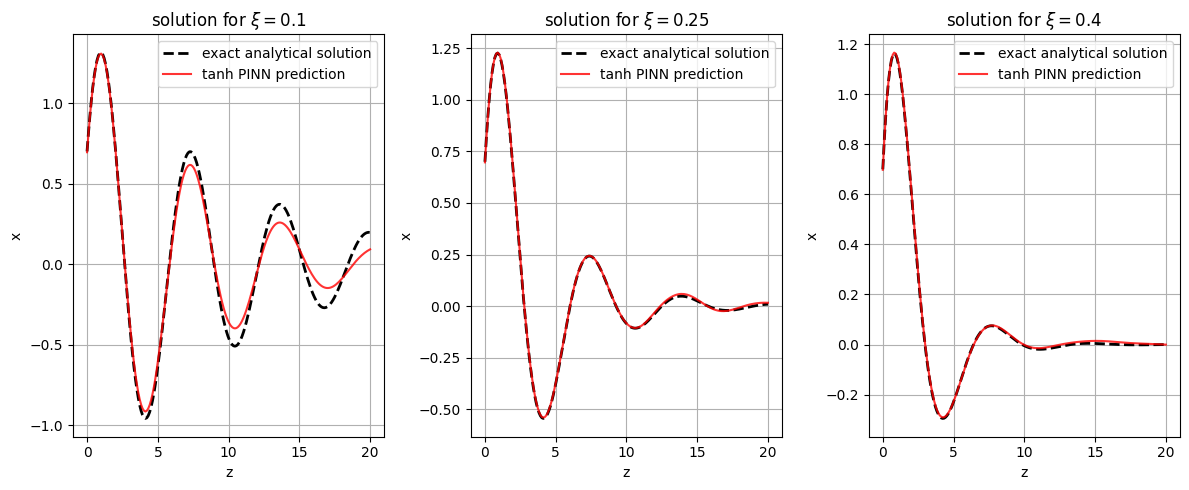

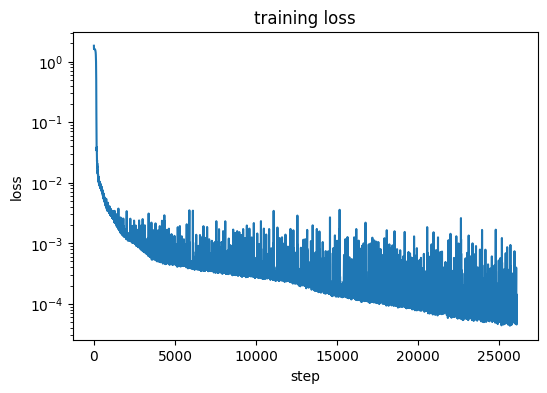

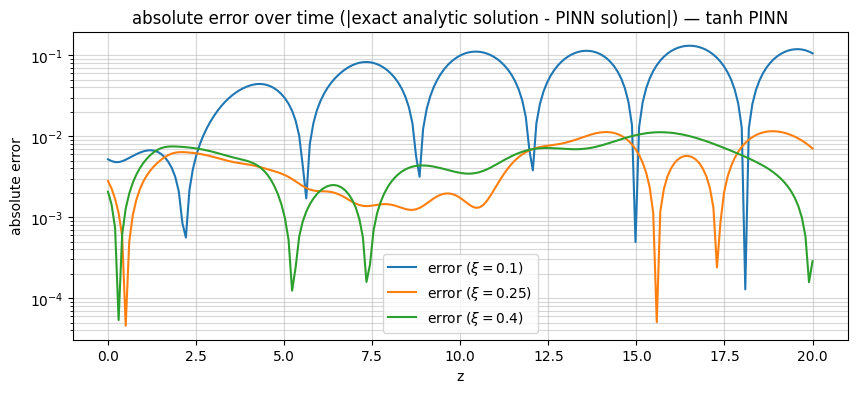

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# define the PINN architecture model and forward pass
# input 2 features, z and xi and ouput 1 feature x

class OscillatorPINN(nn.Module):
    def __init__(self):
        super(OscillatorPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )
    def forward(self, z, xi):
        # normalization step
        z_norm = 2.0 * (z - 0.0) / (20.0 - 0.0) - 1.0
        xi_norm = 2.0 * (xi - 0.1) / (0.4 - 0.1) - 1.0
        # I feed the nromalized values into the layers
        inputs = torch.cat([z_norm, xi_norm], dim=1)
        return self.net(inputs)

# define the physics informed loss function 
def physics_loss(model, z, xi):
    
    # enable gradient tracking for z
    z.requires_grad = True
    
    # predict x
    x = model(z, xi)
    
    # compute first derivative (dx/dz)
    dx_dz = torch.autograd.grad(
        x, z, 
        grad_outputs=torch.ones_like(x), 
        create_graph=True, 
        retain_graph=True
    )[0]
    
    # compute second derivative (d^2x/dz^2)
    d2x_dz2 = torch.autograd.grad(
        dx_dz, z, 
        grad_outputs=torch.ones_like(dx_dz), 
        create_graph=True, 
        retain_graph=True
    )[0]
                                            # this is just the left hand side of the PDE specified in the
    residual = d2x_dz2 + 2 * xi * dx_dz + x # test on the ML4SC website and, since is = 0, the residual
                                            # just tell me how much off the prediction x is from the 0.

                                    # the mean of one positive and one negative 
    return torch.mean(residual**2)  # value of the same module is 0, so it's
                                    # required to square to account them as penalty


# training loop 
def train_pinn(model, steps=100000, lr=1e-3, patience=2000, min_delta=1e-6):
    # choosed optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # initial conditions targets (specified in the test on the ML4SC website)
    x0_target = 0.7
    v0_target = 1.2
   
    # windows for the average loss calculation
    window = 100
    loss_window = []

    loss_history = []
    best_loss = float('inf')
    patience_counter = 0

    print("starting training...")
    
    for step in range(steps):
        optimizer.zero_grad()
         
        # sample random points for z and xi in given domains (specified in the test on the ML4SC website) at each step
        # this help us to cover the domain well over time
        batch_size = 5000
        z_col = torch.rand(batch_size, 1) * 20.0
        xi_col = torch.rand(batch_size, 1) * (0.4 - 0.1) + 0.1
        # at each of this random points we calculate the loss/physics violation
        loss_physics = physics_loss(model, z_col, xi_col)
        
        # initial condition loss (boundary loss)
        # Sample random xi for the boundary condition
        xi_bc = torch.rand(batch_size // 4, 1) * (0.4 - 0.1) + 0.1 # we pick a random xi again, no matter what xi I took, the oscillator always start in the same spot
        z_bc = torch.zeros_like(xi_bc) # z is always 0 here
        z_bc.requires_grad = True # we still need to track z if I want to track how much fast x change with z, so dx/dz

        # guess of the position at t=0:
        x_bc = model(z_bc, xi_bc)
        
        # then compute velocity at t=0:
        dx_bc = torch.autograd.grad(
            x_bc, z_bc,
            grad_outputs=torch.ones_like(x_bc),
            create_graph=True,
            retain_graph=True
        )[0]
        # then calculate the penalty for position and velocity:
        loss_ic_x = torch.mean((x_bc - x0_target)**2)
        loss_ic_v = torch.mean((dx_bc - v0_target)**2)
        
                                                    # total loss, infact without the penalty for position and velocity
        loss = loss_physics + loss_ic_x + loss_ic_v # I would have that x=0 and v=0 for every time step minimize the loss and  
                                                    # so is the solution but that cannot be since of ICs different from zero
        
        loss.backward()
        optimizer.step()
        
        current_loss = loss.item()
        loss_history.append(loss.item())

        # early stopping criteria: if the average loss doesnt improve at least of min_delta, for a number of consecutive steps equal to the patience, it stops early.
        loss_window.append(current_loss)
        if len(loss_window) > window:
            loss_window.pop(0)
        avg_loss = sum(loss_window) / len(loss_window)

        if avg_loss < best_loss - min_delta:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1
    
        if patience_counter >= patience:
            print(f"\nEarly stopping at step {step}")
            print(f"Best loss: {best_loss:.6f}, Current loss: {current_loss:.6f}")
            break
    
        if step % 1000 == 0:
            print(f"Step {step}: Loss = {current_loss:.6f}, Avg Loss of last 100 steps = {avg_loss:.6f} (Best: {best_loss:.6f}, Patience: {patience_counter}/{patience})")
    return loss_history

# validation & visualization 
def analytical_solution(z, xi, x0=0.7, v0=1.2):
    omega_n = 1.0 # from wikipedia page  on Harmonic oscillator, this is the natural frequency, this is just the coeff of x in the PDE so it's 1
    omega_d = np.sqrt(omega_n**2 - xi**2) # this is the damped natural frequency in the case of omega_n=1
    
    # integrations constants A and B to be founded with ICs, since the solution from  
    # wikipedia is x(z)=exp(-xi*omega_n*z)*(A*cos(omega_d*t)+B*sin(omega_d*z)) I would have:
    # x(0) = A = x0
    # x'(0) = -xi*omega_n*A + omega_d*B = v0
    A = x0
    B = (v0 + xi * omega_n * x0) / omega_d
    
    return np.exp(-xi * omega_n * z) * (A * np.cos(omega_d * z) + B * np.sin(omega_d * z))

# plotting results for specific xi values and testing with xi = 0.1 (low damping), xi=0.25 (medium damping), xi = 0.4 (high damping)
def plot_predictions(model, model_name="PINN", test_xis=[0.1, 0.25, 0.4]): 
    z_test = torch.linspace(0, 20, 200).view(-1, 1)
    plt.figure(figsize=(12, 5))
    for i, xi_val in enumerate(test_xis):
        xi_test = torch.full_like(z_test, xi_val)
        with torch.no_grad():
            x_pred = model(z_test, xi_test).numpy()
        x_exact = analytical_solution(z_test.numpy(), xi_val)
        plt.subplot(1, 3, i+1)
        plt.plot(z_test, x_exact, 'k--', label="exact analytical solution", linewidth=2)
        plt.plot(z_test, x_pred, 'r', label=f"{model_name} prediction", alpha=0.8)
        plt.title(f"solution for $\\xi={xi_val}$")
        plt.xlabel("z")
        plt.ylabel("x")
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    plt.show()

# plot loss curve
def plot_loss(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history)
    plt.yscale('log') # the error drops drastically at first and then very slowly so its better use this scale
    plt.title("training loss")
    plt.xlabel("step")
    plt.ylabel("loss")
    plt.show()
    
# plot the error analysis
def plot_error(model, model_name="PINN", test_xis=[0.1, 0.25, 0.4]):
    z_test = torch.linspace(0, 20, 200).view(-1, 1)
    plt.figure(figsize=(10, 4))
    for xi_val in test_xis:
        xi_test = torch.full_like(z_test, xi_val)
        with torch.no_grad():
            x_pred = model(z_test, xi_test).numpy()
        x_exact = analytical_solution(z_test.numpy(), xi_val)
        # calculate absolute error
        error = np.abs(x_exact - x_pred)
        plt.plot(z_test, error, label=f"error ($\\xi={xi_val}$)")
    plt.yscale('log')
    plt.title(f"absolute error over time (|exact analytic solution - PINN solution|) — {model_name}")
    plt.xlabel("z")
    plt.ylabel("absolute error")
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.show()


pinn = OscillatorPINN()
history = train_pinn(pinn, steps=100000)
plot_predictions(pinn, "tanh PINN")
plot_loss(history)
plot_error(pinn, "tanh PINN")


## Experiment 2
* **Changes with respect experiment 1**: I have change the activation function from nn.Tanh() to nn.Relu()
* **Observations**: ReLu activation function is unsuitable for this second order ODEs because its second derivative is zero everywhere. This causes the physics loss term $\frac{d^2x}{dz^2}$ to vanish, preventing the model from learning the acceleration. This confirms that for this problem smooth activation functions like Tanh must be used.

starting training...
Step 0: Loss = 2.114813, Avg Loss of last 100 steps = 2.114813 (Best: 2.114813, Patience: 0/2000)
Step 1000: Loss = 1.603648, Avg Loss of last 100 steps = 1.596320 (Best: 1.446555, Patience: 536/2000)
Step 2000: Loss = 1.622082, Avg Loss of last 100 steps = 1.621351 (Best: 1.446555, Patience: 1536/2000)

Early stopping at step 2464
Best loss: 1.446555, Current loss: 1.619362


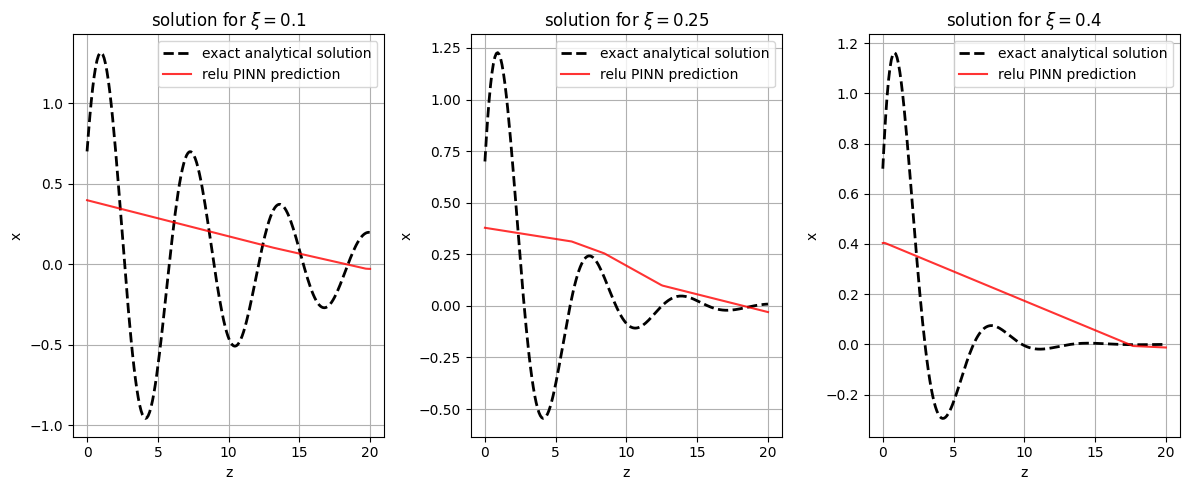

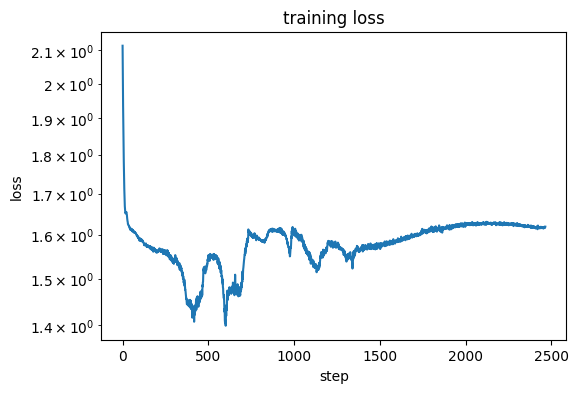

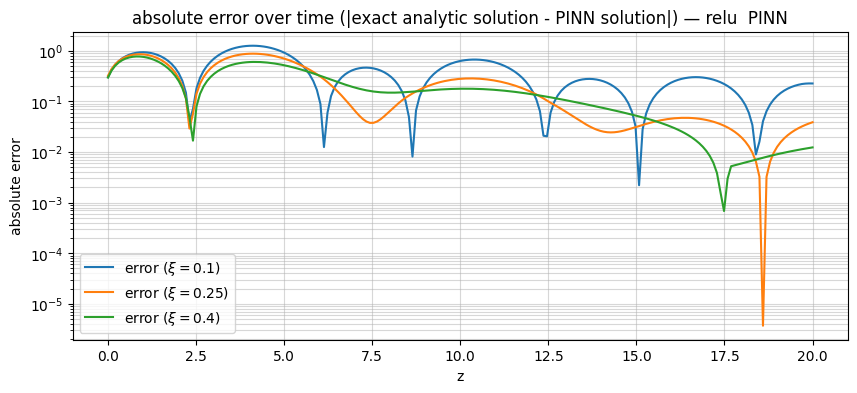

In [10]:
class ReluPINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 1)
        )
    def forward(self, z, xi):
        # normalization step
        z_norm = 2.0 * (z - 0.0) / (20.0 - 0.0) - 1.0
        xi_norm = 2.0 * (xi - 0.1) / (0.4 - 0.1) - 1.0
        # I feed the nromalized values into the layers
        inputs = torch.cat([z_norm, xi_norm], dim=1)
        return self.net(inputs)

relu_model=ReluPINN()
hist_relu = train_pinn(relu_model, steps=100000)

# plotting results for specific xi values
plot_predictions(relu_model, "relu PINN")

# plot loss curve
plot_loss(hist_relu)

# plot the error analysis
plot_error(relu_model, "relu  PINN")



## Experiment 3 A and 3 B
* **Changes with respect experiment 1**: I have make a set of two experiments where I have taken a deeper model (EXPERIMENT 3 A) and a wider one (experiment 3 B). 
* **Observations**: The deeper model helped us to predict better. The wider model needs more max epochs to hit the patience limit, and it's worth a shot to continue to play and research with it, since, I quote:
> When compared to the shallow architecture, more hidden layers aid in the modeling of complicated
> nonlinear relationships (Sengupta et al, 2020), however, using PINNs for real
> problems can result in deep networks with many layers associated with high
> training costs and efficiency issues. For this reason, not only deep neural networks have been employed for PINNs but also shallow ANN are reported > in the literature. X-TFC, developed by Schiassi et al (2021), employs a single-layer
> NN trained using the ELM algorithm. While PIELM (Dwivedi and Srinivasan,
> 2020) is proposed as a faster alternative, using a hybrid neural network-based
> method that combines two ideas from PINN and ELM. ELM only updates the
> weights of the outer layer, leaving the weights of the inner layer unchanged.
> Finally, in Ramabathiran and Ramachandran (2021) a Sparse, Physics-based,
> and partially Interpretable Neural Networks (SPINN) is proposed
> 
>  — *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.1.1, Page 23*

starting training...
Step 0: Loss = 1.765270, Avg Loss of last 100 steps = 1.765270 (Best: 1.765270, Patience: 0/2000)
Step 1000: Loss = 0.005075, Avg Loss of last 100 steps = 0.005663 (Best: 0.005663, Patience: 0/2000)
Step 2000: Loss = 0.002699, Avg Loss of last 100 steps = 0.002838 (Best: 0.002836, Patience: 17/2000)
Step 3000: Loss = 0.001453, Avg Loss of last 100 steps = 0.001610 (Best: 0.001588, Patience: 98/2000)
Step 4000: Loss = 0.001040, Avg Loss of last 100 steps = 0.001024 (Best: 0.001024, Patience: 0/2000)
Step 5000: Loss = 0.000812, Avg Loss of last 100 steps = 0.000995 (Best: 0.000832, Patience: 146/2000)
Step 6000: Loss = 0.001301, Avg Loss of last 100 steps = 0.000779 (Best: 0.000768, Patience: 508/2000)
Step 7000: Loss = 0.000513, Avg Loss of last 100 steps = 0.000690 (Best: 0.000557, Patience: 136/2000)
Step 8000: Loss = 0.001051, Avg Loss of last 100 steps = 0.000620 (Best: 0.000533, Patience: 476/2000)
Step 9000: Loss = 0.000462, Avg Loss of last 100 steps = 0.0006

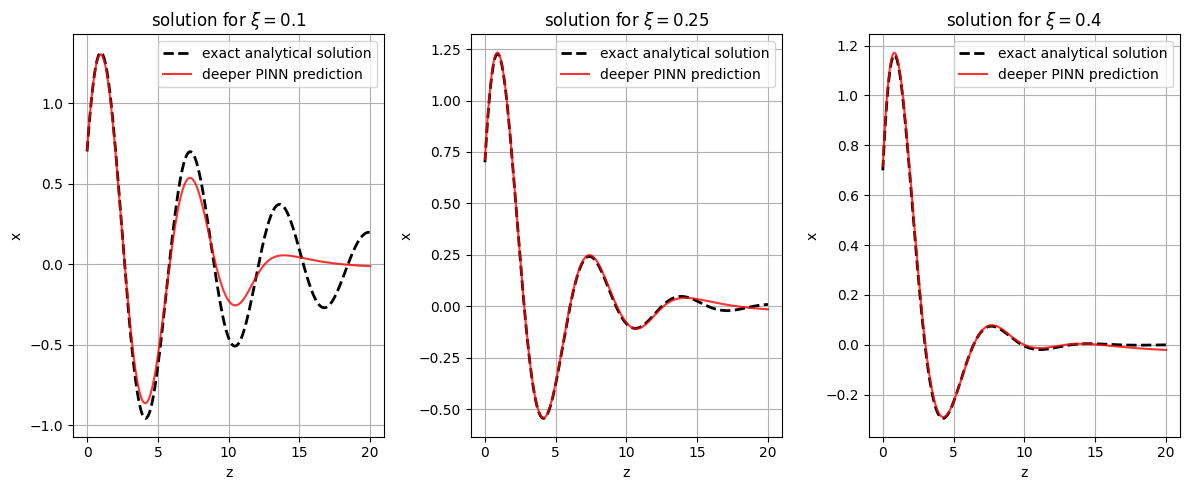

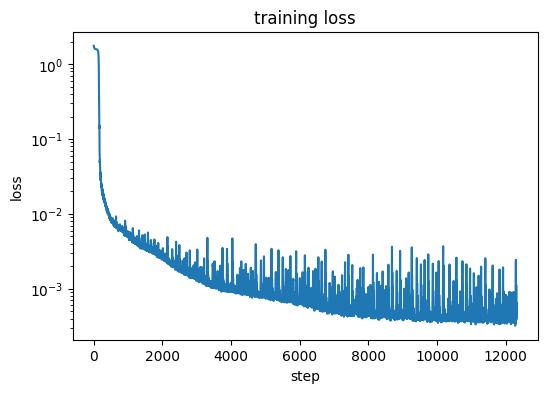

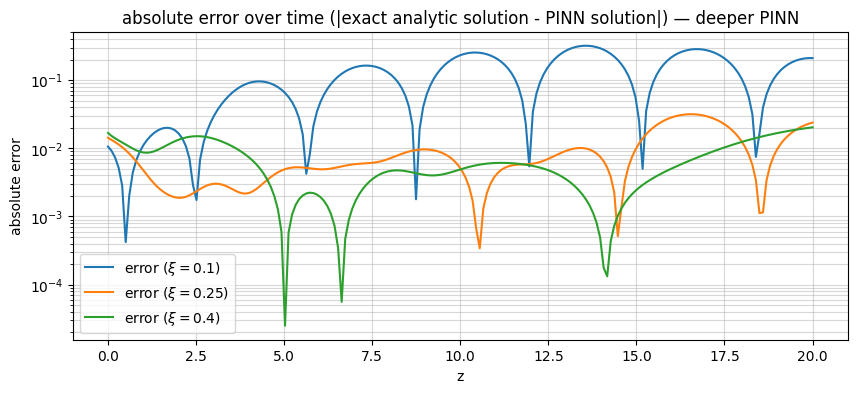

In [11]:
class DeeperPINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 20),   
            nn.Tanh(),
            nn.Linear(20, 20),  
            nn.Tanh(),
            nn.Linear(20, 20),  
            nn.Tanh(),
            nn.Linear(20, 20),  
            nn.Tanh(),
            nn.Linear(20, 20),  
            nn.Tanh(),
            nn.Linear(20, 20),  
            nn.Tanh(),
            nn.Linear(20, 1)         
        )
    def forward(self, z, xi):
        # normalization step
        z_norm = 2.0 * (z - 0.0) / (20.0 - 0.0) - 1.0
        xi_norm = 2.0 * (xi - 0.1) / (0.4 - 0.1) - 1.0
        # I feed the nromalized values into the layers
        inputs = torch.cat([z_norm, xi_norm], dim=1)
        return self.net(inputs)

deeper_model=DeeperPINN()
hist_deeper = train_pinn(deeper_model, steps=100000)

# plotting results for specific xi values
plot_predictions(deeper_model, "deeper PINN")

# plot loss curve
plot_loss(hist_deeper)

# plot the error analysis
plot_error(deeper_model, "deeper PINN")


starting training...
Step 0: Loss = 1.741606, Avg Loss of last 100 steps = 1.741606 (Best: 1.741606, Patience: 0/2000)
Step 1000: Loss = 0.560047, Avg Loss of last 100 steps = 0.622980 (Best: 0.622980, Patience: 0/2000)
Step 2000: Loss = 0.105576, Avg Loss of last 100 steps = 0.111493 (Best: 0.111493, Patience: 0/2000)
Step 3000: Loss = 0.034848, Avg Loss of last 100 steps = 0.035588 (Best: 0.035588, Patience: 0/2000)
Step 4000: Loss = 0.010255, Avg Loss of last 100 steps = 0.011412 (Best: 0.011412, Patience: 0/2000)
Step 5000: Loss = 0.004188, Avg Loss of last 100 steps = 0.004592 (Best: 0.004592, Patience: 0/2000)
Step 6000: Loss = 0.002458, Avg Loss of last 100 steps = 0.002539 (Best: 0.002539, Patience: 0/2000)
Step 7000: Loss = 0.001661, Avg Loss of last 100 steps = 0.001820 (Best: 0.001820, Patience: 2/2000)
Step 8000: Loss = 0.001787, Avg Loss of last 100 steps = 0.001546 (Best: 0.001491, Patience: 115/2000)
Step 9000: Loss = 0.001331, Avg Loss of last 100 steps = 0.001363 (Best

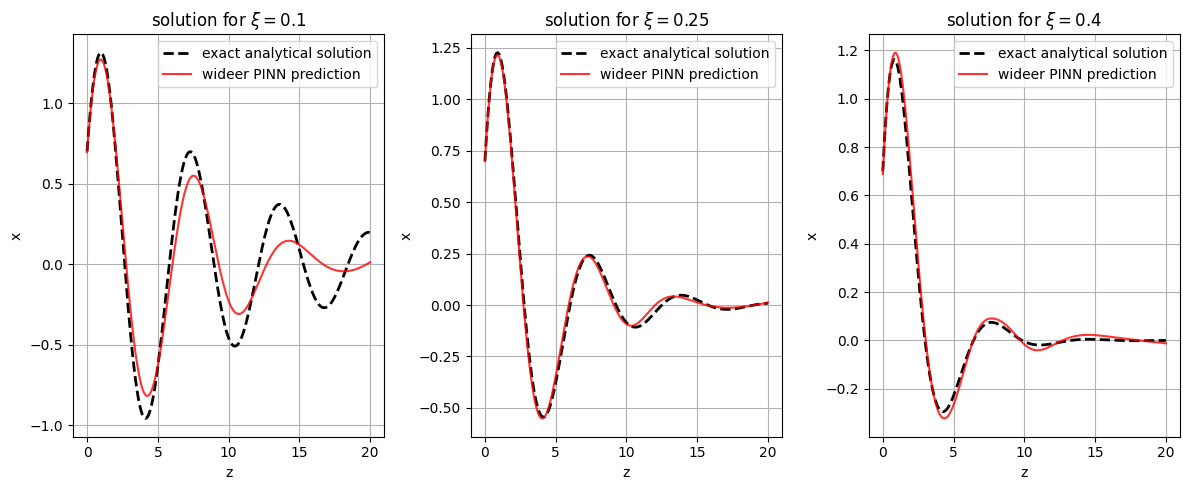

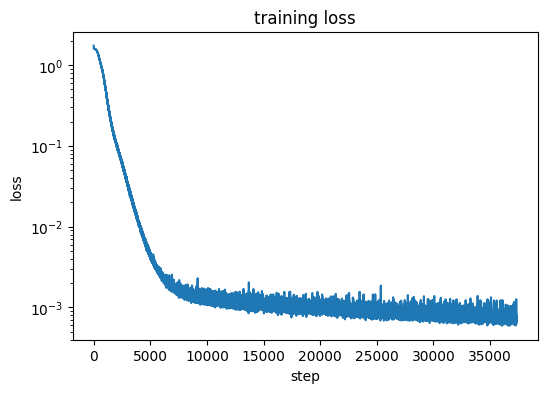

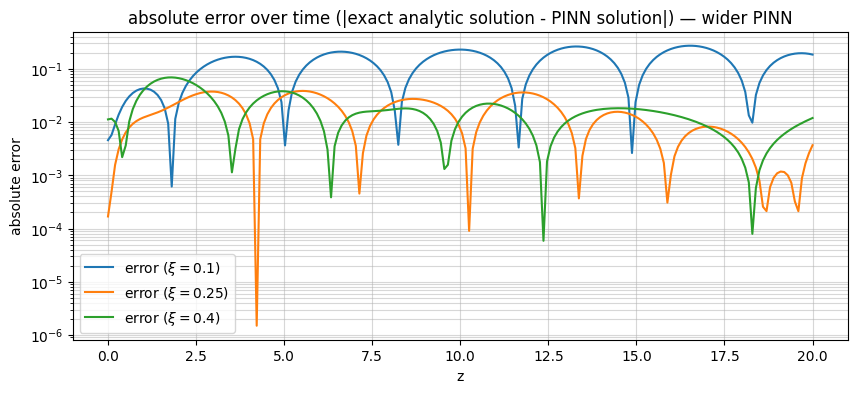

In [12]:
class WiderPINN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 200),  
            nn.Tanh(),
            nn.Linear(200, 1)   
        )
    def forward(self, z, xi):
        # normalization step
        z_norm = 2.0 * (z - 0.0) / (20.0 - 0.0) - 1.0
        xi_norm = 2.0 * (xi - 0.1) / (0.4 - 0.1) - 1.0
        # I feed the nromalized values into the layers
        inputs = torch.cat([z_norm, xi_norm], dim=1)
        return self.net(inputs)


wider_model=WiderPINN()
hist_wider = train_pinn(wider_model, steps=100000)


# plotting results for specific xi values
plot_predictions(wider_model, "wideer PINN")

# plot loss curve
plot_loss(hist_wider)

# plot the error analysis
plot_error(wider_model, "wider PINN")


## Experiment 4
* **Changes with respect experiment 1**: In the experiment 1 the lossess for position and velocity have the same weight as the physic loss. I now propose to modify that in experiment 4 going from the old loss:
                                                  <center>loss = loss_physics + loss_ic_x + loss_ic_v</center>                                                           
    to a new loss:
                                            <center>loss = loss_physics +$\lambda$*(loss_ic_x + loss_ic_v)</center>
  where I have choosed $\lambda$=10                                                        
* **Observations**: Since the Experiments 1, 3A and 3B were able to plot the solution almost identical for the first time steps the problem is to make it able to be accurate also for the last time steps and by enforcing the weight of the position and velocity this should be possible. But in my experiments the term loss_ic_x + loss_ic_v goes dropped to much fast in the first 1000 steps. This suggest that I need to implement some other methods on the loss or take a bigger $\lambda$. 


starting training...
Step 0: Loss = 2172.214355, Avg Loss of last 100 steps = 2172.214355 (Best: 2172.214355, Patience: 0/1000)
Step 1000: Loss = 5.410488, Avg Loss of last 100 steps = 6.163869 (Best: 6.163869, Patience: 0/1000)
Step 2000: Loss = 0.210933, Avg Loss of last 100 steps = 0.308982 (Best: 0.302743, Patience: 48/1000)
Step 3000: Loss = 0.082788, Avg Loss of last 100 steps = 0.131517 (Best: 0.065026, Patience: 55/1000)
Step 4000: Loss = 0.382795, Avg Loss of last 100 steps = 0.108378 (Best: 0.055401, Patience: 482/1000)
Step 5000: Loss = 0.413036, Avg Loss of last 100 steps = 0.106390 (Best: 0.047408, Patience: 289/1000)
Step 6000: Loss = 0.044447, Avg Loss of last 100 steps = 0.139151 (Best: 0.042487, Patience: 78/1000)
Step 7000: Loss = 0.385513, Avg Loss of last 100 steps = 0.192703 (Best: 0.039323, Patience: 166/1000)
Step 8000: Loss = 0.037546, Avg Loss of last 100 steps = 0.120418 (Best: 0.037243, Patience: 409/1000)
Step 9000: Loss = 0.499904, Avg Loss of last 100 step

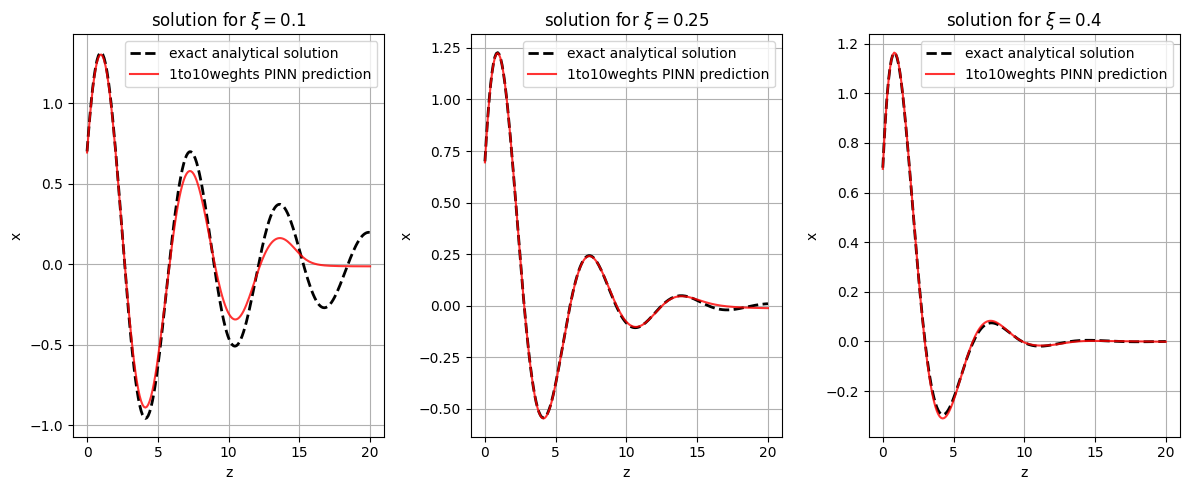

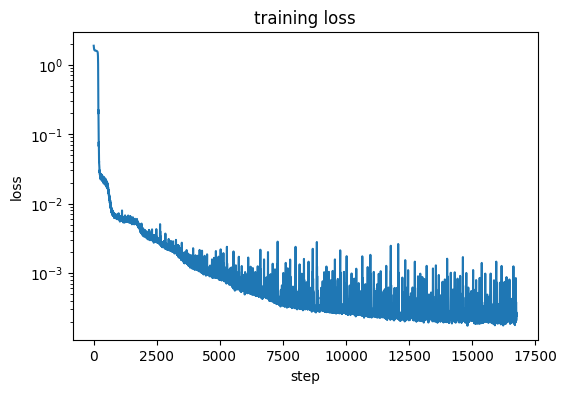

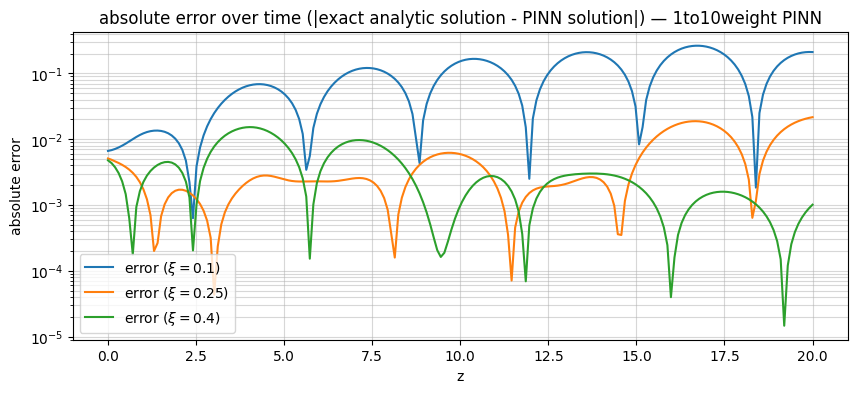

In [14]:
def train_pinn_1_to_10_weights(model, steps=10000, lr=1e-3, patience=1000, min_delta=1e-6):
    # choosed optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # initial conditions targets (specified in the test on the ML4SC website)
    x0_target = 0.7
    v0_target = 1.2

    # windows for the average loss calculation
    window = 100
    loss_window = []
    
    loss_history = []
    best_loss = float('inf')
    patience_counter = 0

    print("starting training...")
    
    
    for step in range(steps):
        optimizer.zero_grad()
         
        # sample random points for z and xi in given domains (specified in the test on the ML4SC website)
        batch_size = 1000
        z_col = torch.rand(batch_size, 1) * 20.0
        xi_col = torch.rand(batch_size, 1) * (0.4 - 0.1) + 0.1
        # at each of this random points we calculate the loss/physics violation
        loss_physics = physics_loss(model, z_col, xi_col)
        
        # initial condition loss (boundary loss)
        # Sample random xi for the boundary condition
        xi_bc = torch.rand(batch_size // 4, 1) * (0.4 - 0.1) + 0.1 # we pick a random xi again, no matter what xi I took, the oscillator always start in the same spot
        z_bc = torch.zeros_like(xi_bc) # z is always 0 here
        z_bc.requires_grad = True # we still need to track z if I want to track how much fast x change with z, so dx/dz

        # guess of the position at t=0:
        x_bc = model(z_bc, xi_bc)
        
        # then compute velocity at t=0:
        dx_bc = torch.autograd.grad(
            x_bc, z_bc,
            grad_outputs=torch.ones_like(x_bc),
            create_graph=True,
            retain_graph=True
        )[0]
        # then calculate the penalty for position and velocity:
        loss_ic_x = torch.mean((x_bc - x0_target)**2)
        loss_ic_v = torch.mean((dx_bc - v0_target)**2)
        
                                                                # total loss, infact without the penalty for position and velocity
        loss = loss_physics + 1000*loss_ic_x + 1000*loss_ic_v   # I would have that x=0 and v=0 for every time step minimize the loss and  
                                                                # so is the solution but that cannot be since of ICs different from zero
        
        loss.backward()
        optimizer.step()

        current_loss = loss.item()
        loss_history.append(loss.item())
        
        # early stopping criteria: if the average loss doesnt improve at least of min_delta, for a number of consecutive steps equal to the patience, it stops early.
        loss_window.append(current_loss)
        if len(loss_window) > window:
            loss_window.pop(0)
        avg_loss = sum(loss_window) / len(loss_window)

        if avg_loss < best_loss - min_delta:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1
    
        if patience_counter >= patience:
            print(f"\nEarly stopping at step {step}")
            print(f"Best loss: {best_loss:.6f}, Current loss: {current_loss:.6f}")
            break
    
        if step % 1000 == 0:
            print(f"Step {step}: Loss = {current_loss:.6f}, Avg Loss of last 100 steps = {avg_loss:.6f} (Best: {best_loss:.6f}, Patience: {patience_counter}/{patience})")
    return loss_history

pinn_1_to_10_weights = OscillatorPINN()
hist_1_to_10_weights= train_pinn_1_to_10_weights(pinn_1_to_10_weights, steps=10000, lr=0.001)

deeper_model=DeeperPINN()
hist_deeper = train_pinn(deeper_model, steps=100000)

# plotting results for specific xi values
plot_predictions(deeper_model, "1to10weghts PINN")

# plot loss curve
plot_loss(hist_deeper)

# plot the error analysis
plot_error(deeper_model, "1to10weight PINN")


# Task ideas to do during GSoC 2026 : Physics-Informed Neural Network Diffusion Equation (PINNDE)
- Map a 3D zero mean, unit variance, diagonal normal to a 3D non-Gaussian density using a PINN. The inputs to the PINN are t, x, y, z — that is, the reverse time t ∈ [1, 0] and a point sampled from the 3D normal. The output of the PINN is the vector solution u(t, x, y, z). Since the PINN is conditioned on x, y, z, during training the points can be sampled from any convenient distribution, including quasi-random sampling such as Sobol sampling. (Of course, when used we must sample from a 3D normal.)
- Repeat with increasingly complex 3D non-Gaussian densities.
- Optional: Apply what has been learned from 1 and 2 to build a fast calorimeter simulator. Use Dataset 1 from the Fast Calorimeter Simulation Challenge 2022 [4].
- Publish the results in an ML paper.
## Things that I have learned during the exercise/test
- I used torch.rand and noticed that the loss fluctuated and I needed many points (1000+) to get a stable result. In 4 dimension, take 1000+ points in each dimension would put me to have 1'000'000'000'000+ points. If I take just 1000 random points in the whole quadridimensional space the gaps beetween the points would be bigger. So as mentioned I need to use the Sobol sequences, this would give me more omogeneurs cover of the space.
- In the xi=0.1 case the function became more complex with wiggles. The Calomiter Data would likely suffer of this spiky behaviour because of sharp peaks where the particles hit the detector, a standard PINN as we have seen in this tests/experiments would smoorth these out and fail.
- With PINNs even a simple problem as this one is not trivial: just taking a deeper PINN didnt improve my results, this suggest that even for simple problems PINN are very complex because I should implement even for this easy case some residual connections. The complexity of the architecture required in the problem of the calorimeter would be even greater. 
  


# Wrap up everything in a single plot graph, a single loss graph and a single difference graph

Let's now put all together on a single diagram for better understanding, here I can play with the different models I have discussed up. Relu model will be discarded from so on, since it's useless. Also the comparison would be more rigorous by the introduction of three tables for the metrics for the three damping terms.

# First set of experiments
We will now rerun the 4 experiments with the same parameters and put them on the same graph:
 * **BasePINN**: "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":2000
 * **DeeperPINN**: "lambda": 1.0, "dim": 50, "layers": 6, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":2000
 * **WiderPINN**: "lambda": 1.0, "dim": 200, "layers": 1, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":2000
 * **WeightedPINN**: "lambda": 10.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":2000

--- starting Experiment: Standard Tanh (loss lambda_ICs=1.0) ---
Step 0: Loss = 1.822458, Avg Loss of last 100 steps = 1.822458 (Best: 1.822458, Patience: 0/2000)
Step 1000: Loss = 0.003223, Avg Loss of last 100 steps = 0.003805 (Best: 0.003805, Patience: 0/2000)
Step 2000: Loss = 0.001191, Avg Loss of last 100 steps = 0.001416 (Best: 0.001396, Patience: 15/2000)
Step 3000: Loss = 0.000891, Avg Loss of last 100 steps = 0.001105 (Best: 0.001017, Patience: 123/2000)
Step 4000: Loss = 0.000909, Avg Loss of last 100 steps = 0.000719 (Best: 0.000690, Patience: 56/2000)
Step 5000: Loss = 0.000616, Avg Loss of last 100 steps = 0.000628 (Best: 0.000556, Patience: 208/2000)
Step 6000: Loss = 0.000433, Avg Loss of last 100 steps = 0.000573 (Best: 0.000486, Patience: 185/2000)
Step 7000: Loss = 0.000530, Avg Loss of last 100 steps = 0.000410 (Best: 0.000403, Patience: 9/2000)
Step 8000: Loss = 0.000466, Avg Loss of last 100 steps = 0.000457 (Best: 0.000387, Patience: 236/2000)
Step 9000: Loss = 0

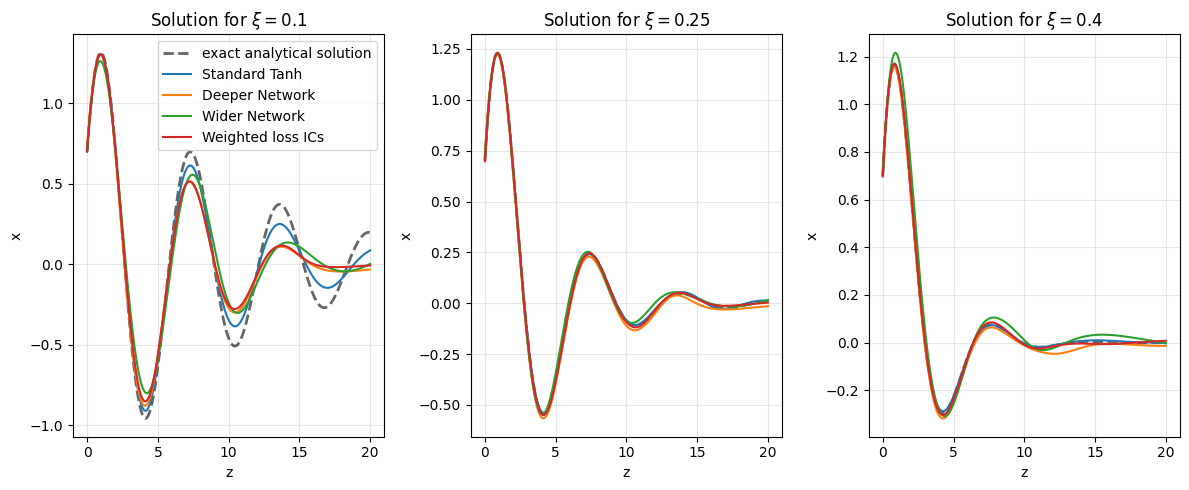

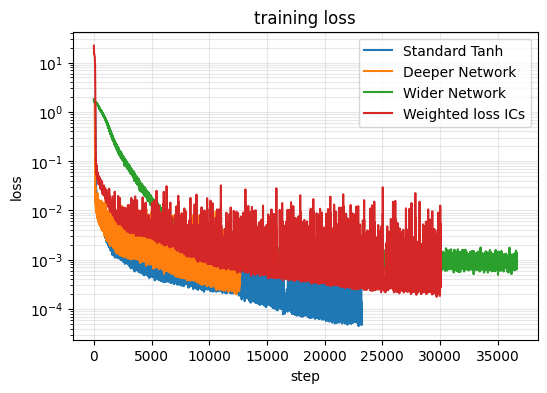

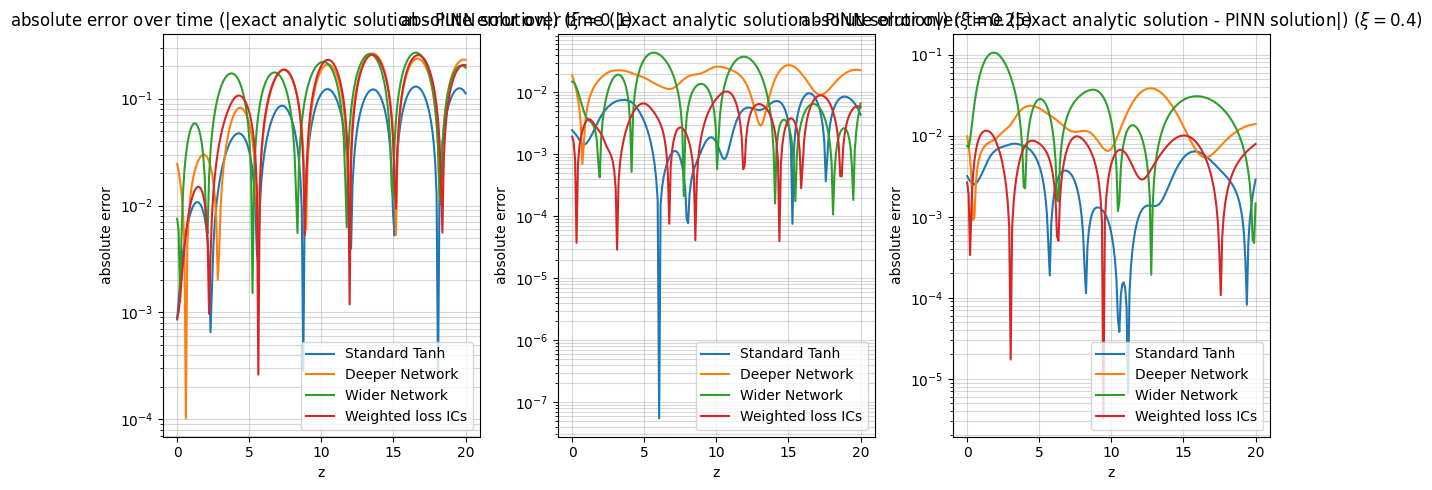


  ξ = 0.1
            Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
    Standard Tanh 0.058850   0.129833      0.136030    0.000079  23238
   Deeper Network 0.112202   0.265122      0.260097    0.001365  12673
    Wider Network 0.129293   0.269806      0.283853    0.001046  36639
Weighted loss ICs 0.116259   0.258113      0.267119    0.000274  30060

  ξ = 0.25
            Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
    Standard Tanh 0.004006   0.009675      0.012779    0.000079  23238
   Deeper Network 0.016706   0.027460      0.046987    0.001365  12673
    Wider Network 0.012906   0.043762      0.047240    0.001046  36639
Weighted loss ICs 0.003904   0.010326      0.012395    0.000274  30060

  ξ = 0.4
            Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
    Standard Tanh 0.003248   0.007970      0.012011    0.000079  23238
   Deeper Network 0.014975   0.038446      0.052118    0.001365  12673
    Wider Network 0.026348   0.105943      

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# define the PINN architecture model and forward pass
# input 2 features z and xi and ouput 1 feature x
class BasePINN(nn.Module):
    def __init__(self, activation=nn.Tanh, hidden_dim=50, hidden_layers=3):
        super().__init__()
        layers = [] # I initialize the number of layers as a empty list, I will add more and more layers with .append
        
        # input layer, is made by a linear layer and a layer with the activation function
        layers.append(nn.Linear(2, hidden_dim))
        layers.append(activation())
        
        # a tot number of hidden layer, each of a linear layer and a layer with the activation function
        for _ in range(hidden_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(activation())
            
        # Output layer (hidden -> 1)
        layers.append(nn.Linear(hidden_dim, 1))
        
        self.net = nn.Sequential(*layers)

    def forward(self, z, xi):
        # normalization step
        z_norm = 2.0 * (z - 0.0) / (20.0 - 0.0) - 1.0
        xi_norm = 2.0 * (xi - 0.1) / (0.4 - 0.1) - 1.0
        # I feed the nromalized values into the layers
        inputs = torch.cat([z_norm, xi_norm], dim=1)
        return self.net(inputs)


# define the physics informed loss function 
def physics_loss(model, z, xi):
        
    # enable gradient tracking for z
    z.requires_grad = True
    
    # predict x
    x = model(z, xi)
    
    # compute first derivative (dx/dz)
    dx_dz = torch.autograd.grad(
        x, z,
        torch.ones_like(x),
        create_graph=True
    )[0]
    
    # compute second derivative (d^2x/dz^2)
    d2x_dz2 = torch.autograd.grad(
        dx_dz, z,
        torch.ones_like(dx_dz), 
        create_graph=True
    )[0]
    
                                            # this is just the left hand side of the PDE specified in the
    residual = d2x_dz2 + 2 * xi * dx_dz + x # test on the ML4SC website and, since is = 0, the residual
                                            # just tell me how much off the prediction x is from the 0.

                                    # the mean of one positive and one negative
    return torch.mean(residual**2)  # value of the same module is 0, so it's
                                    # required to square to account them as penalty
    
# training loop 
def train_experiment(model_name, activation, lambda_ic=1.0, hidden_dim=50, layers=3, steps=10000, batch_size=1000, lr=1e-3, patience=1000, min_delta=1e-6):

    print(f"--- starting Experiment: {model_name} (loss lambda_ICs={lambda_ic}) ---")
    
    # I use the previous class to initialize the model
    model = BasePINN(activation=activation, hidden_dim=hidden_dim, hidden_layers=layers)
    
    # choosed optimizer
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    
    # initial conditions targets (specified in the test on the ML4SC website)
    x0_target = 0.7
    v0_target = 1.2
    
    # windows for the average loss calculation
    window = 100
    loss_window = []
    
    loss_history = []
    best_loss = float('inf')
    patience_counter = 0

    for step in range(steps):
        optimizer.zero_grad()
        
        # sample random points for z and xi in given domains (specified in the test on the ML4SC website)
        z_col = torch.rand(batch_size, 1) * 20.0
        xi_col = torch.rand(batch_size, 1) * (0.4 - 0.1) + 0.1
        # at each of this random points we calculate the loss/physics violation
        loss_physics = physics_loss(model, z_col, xi_col)
        
        # initial condition loss (boundary loss)
        # Sample random xi for the boundary condition
        xi_bc = torch.rand(batch_size//4, 1) * (0.4 - 0.1) + 0.1 # we pick a random xi again, no matter what xi I took, the oscillator always start in the same spot
        z_bc = torch.zeros_like(xi_bc) # z is always 0 here
        z_bc.requires_grad = True # we still need to track z if I want to track how much fast x change with z, so dx/dz

        # guess of the position at t=0:
        x_bc = model(z_bc, xi_bc)

        # then compute the velocity at t=0:
        dx_bc = torch.autograd.grad(
            x_bc, z_bc, 
            torch.ones_like(x_bc), 
            create_graph=True
        )[0]
        # than calculate the penalty for position and velocity:
        loss_ic_val = torch.mean((x_bc - x0_target)**2) + torch.mean((dx_bc - v0_target)**2)
        
                                                        # total loss, infact without the penalty for position and velocity        
        loss = loss_physics + (lambda_ic * loss_ic_val) # I would have that x=0 and v=0 for every time step minimize the loss and 
                                                        # so is the solution but that cannot be since of ICs different from zero       
        loss.backward()
        optimizer.step()
        
        current_loss = loss.item()
        loss_history.append(loss.item())
        
        # early stopping criteria: if the average loss doesnt improve at least of min_delta, for a number of consecutive steps equal to the patience, it stops early.
        loss_window.append(current_loss)
        if len(loss_window) > window:
            loss_window.pop(0)
        avg_loss = sum(loss_window) / len(loss_window)

        if avg_loss < best_loss - min_delta:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1
    
        if patience_counter >= patience:
            print(f"\nEarly stopping at step {step}")
            print(f"Best loss: {best_loss:.6f}, Current loss: {current_loss:.6f}")
            break
    
        if step % 1000 == 0:
            print(f"Step {step}: Loss = {current_loss:.6f}, Avg Loss of last 100 steps = {avg_loss:.6f} (Best: {best_loss:.6f}, Patience: {patience_counter}/{patience})")            
    return model, loss_history

# validation & visualization
def analytical_solution(z, xi, x0=0.7, v0=1.2):
    omega_n = 1.0 # from wikipedia page  on Harmonic oscillator, this is the natural frequency, this is just the coeff of x in the PDE so it's 1
    omega_d = np.sqrt(omega_n**2 - xi**2) # this is the damped natural frequency in the case of omega_n=1
    
    # integrations constants A and B to be founded with ICs, since the solution from  
    # wikipedia is x(z)=exp(-xi*omega_n*z)*(A*cos(omega_d*t)+B*sin(omega_d*z)) I would have:
    # x(0) = A = x0
    # x'(0) = -xi*omega_n*A + omega_d*B = v0    
    A = x0
    B = (v0 + xi * omega_n * x0) / omega_d
    
    return np.exp(-xi * omega_n * z) * (A * np.cos(omega_d * z) + B * np.sin(omega_d * z))

# define the experiments
experiments = [
    {"name": "Standard Tanh", "act": nn.Tanh, "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience": 2000},
    # {"name": "ReLU", "act": nn.ReLU, "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 2000, "bs":1000},
    {"name": "Deeper Network", "act": nn.Tanh, "lambda": 1.0, "dim": 50, "layers": 6, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience": 2000},
    {"name": "Wider Network", "act": nn.Tanh, "lambda": 1.0, "dim": 200, "layers": 1, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience": 2000},
    {"name": "Weighted loss ICs", "act": nn.Tanh, "lambda": 10.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience": 2000}
]


def run_experiments(experiments):
    results = {}
    for exp in experiments:
        model, hist = train_experiment(
            model_name=exp["name"],
            activation=exp["act"],
            lambda_ic=exp["lambda"],
            hidden_dim=exp["dim"],
            layers=exp["layers"],
            steps=exp["number of steps"],
            batch_size=exp["bs"],
            lr=exp["lr"],
            patience=exp["patience"]
        )
        results[exp["name"]] = {"model": model, "hist": hist}
    return results

def plot_all_predictions(results, test_xis=[0.1, 0.25, 0.4]):
    z_plot = torch.linspace(0, 20, 200).view(-1, 1)
    plt.figure(figsize=(12, 5))
    for i, xi_val in enumerate(test_xis):
        xi_plot = torch.full_like(z_plot, xi_val)
        # exact solution 
        x_exact = analytical_solution(z_plot.numpy(), xi_val)
        plt.subplot(1, 3, i+1)
        plt.plot(z_plot, x_exact, 'k--', linewidth=2, label="exact analytical solution", alpha=0.6)
        for name, data in results.items():
            # PINN prediction
            with torch.no_grad():
                pred = data["model"](z_plot, xi_plot).numpy()
            style = ':' if "ReLU" in name else '-'
            plt.plot(z_plot, pred, linestyle=style, linewidth=1.5, label=name)
        plt.title(f"Solution for $\\xi={xi_val}$")
        plt.xlabel("z")
        plt.ylabel("x")
        plt.grid(True, alpha=0.3)
        if i == 0: plt.legend()
    plt.tight_layout()
    plt.show()

def plot_all_losses(results):
    plt.figure(figsize=(6, 4))
    for name, data in results.items():
        plt.plot(data["hist"], label=name)
    plt.yscale('log')
    plt.title("training loss")
    plt.xlabel("step")
    plt.ylabel("loss")
    plt.legend()
    plt.grid(True, which="both", alpha=0.3)
    plt.show()

def plot_all_errors(results, test_xis=[0.1, 0.25, 0.4]):
    z_plot = torch.linspace(0, 20, 200).view(-1, 1)
    plt.figure(figsize=(12, 5))
    for i, xi_val in enumerate(test_xis):
        xi_plot = torch.full_like(z_plot, xi_val)
        x_exact = analytical_solution(z_plot.numpy(), xi_val)
        plt.subplot(1, 3, i+1)
        for name, data in results.items():
            with torch.no_grad():
                pred = data["model"](z_plot, xi_plot).numpy()
            # calculate absolute error
            error = np.abs(x_exact - pred)
            plt.plot(z_plot, error, label=name)
        plt.yscale('log')
        plt.title(f"absolute error over time (|exact analytic solution - PINN solution|) ($\\xi={xi_val}$)")
        plt.xlabel("z")
        plt.ylabel("absolute error")
        plt.grid(True, which="both", ls='-', alpha=0.5)
        plt.legend()
    plt.tight_layout()
    plt.show()

def summary_tables(results, test_xis=[0.1, 0.25, 0.4]):
    z_test = torch.linspace(0, 20, 500).view(-1, 1)
    for xi_val in test_xis:
        xi_test = torch.full_like(z_test, xi_val)
        exact = analytical_solution(z_test.numpy(), xi_val)
        rows = []
        for name, data in results.items():
            with torch.no_grad():
                pred = data["model"](z_test, xi_test).numpy()
            err = np.abs(exact - pred)
            rows.append({
                "Model": name,
                "MAE": np.mean(err),
                "Max Error": np.max(err),
                "L2 Rel Error": np.sqrt(np.sum((exact - pred)**2) / np.sum(exact**2)),
                "Final Loss": data["hist"][-1],
                "Steps": len(data["hist"])
            })
        df = pd.DataFrame(rows)
        print(f"\n{'='*70}")
        print(f"  ξ = {xi_val}")
        print(f"{'='*70}")
        print(df.to_string(index=False, float_format="%.6f"))
    print()


    
results = run_experiments(experiments) # initializzation and training
plot_all_predictions(results) # plotting results for specific xi values
plot_all_losses(results) # plot loss curve
plot_all_errors(results) # plot the error analysis
summary_tables(results) # make a summary table where I have some metrics as max, mar, L2 

I notice how the deeper network stop earlier than the other, even if he doesnt exibit a plateau like the wider network, we decide to then modify the first set of experiment by:
- increasing the batch size in the second set of experiments
- increase the patience in the third set of experiments
those are all ways that we hope it will trigger the patience lately, for a bigger number of steps.

# Second set of experiments
I increase the batch size.
 * **BasePINN**: "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":2000
 * **DeeperPINN**: "lambda": 1.0, "dim": 50, "layers": 6, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":2000
 * **WiderPINN**: "lambda": 1.0, "dim": 200, "layers": 1, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":2000
 * **WeightedPINN**: "lambda": 10.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":2000

--- starting Experiment: Standard Tanh (loss lambda_ICs=1.0) ---
Step 0: Loss = 2.179735, Avg Loss of last 100 steps = 2.179735 (Best: 2.179735, Patience: 0/2000)
Step 1000: Loss = 0.003239, Avg Loss of last 100 steps = 0.003429 (Best: 0.003429, Patience: 0/2000)
Step 2000: Loss = 0.001294, Avg Loss of last 100 steps = 0.001136 (Best: 0.001132, Patience: 6/2000)
Step 3000: Loss = 0.000651, Avg Loss of last 100 steps = 0.000658 (Best: 0.000658, Patience: 0/2000)
Step 4000: Loss = 0.000457, Avg Loss of last 100 steps = 0.000462 (Best: 0.000463, Patience: 46/2000)
Step 5000: Loss = 0.000443, Avg Loss of last 100 steps = 0.000544 (Best: 0.000438, Patience: 435/2000)
Step 6000: Loss = 0.000469, Avg Loss of last 100 steps = 0.000472 (Best: 0.000404, Patience: 63/2000)
Step 7000: Loss = 0.000360, Avg Loss of last 100 steps = 0.000512 (Best: 0.000391, Patience: 805/2000)
Step 8000: Loss = 0.000616, Avg Loss of last 100 steps = 0.000419 (Best: 0.000391, Patience: 1805/2000)

Early stopping at s

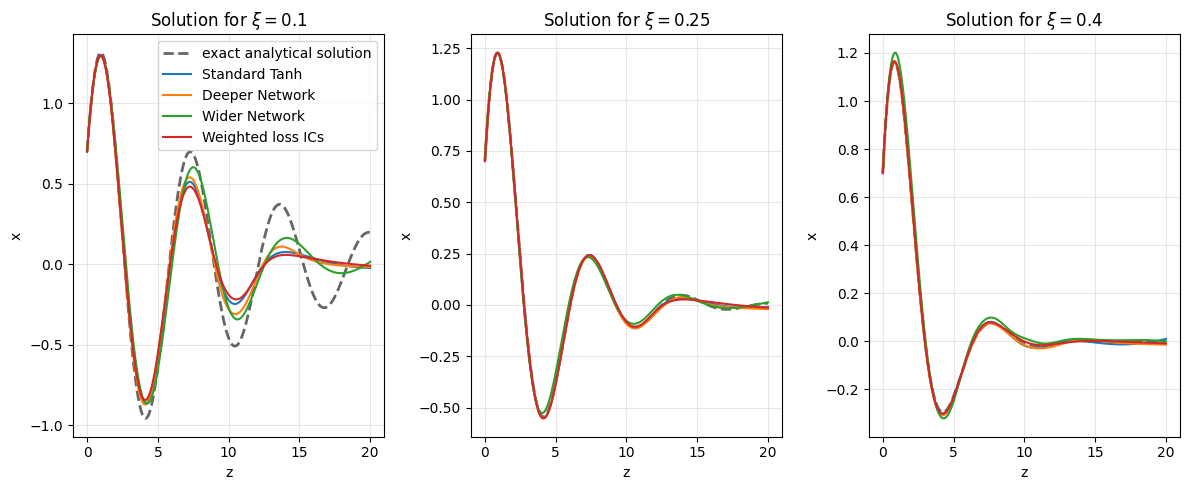

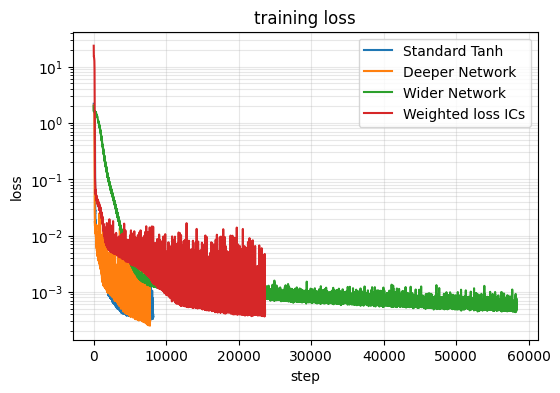

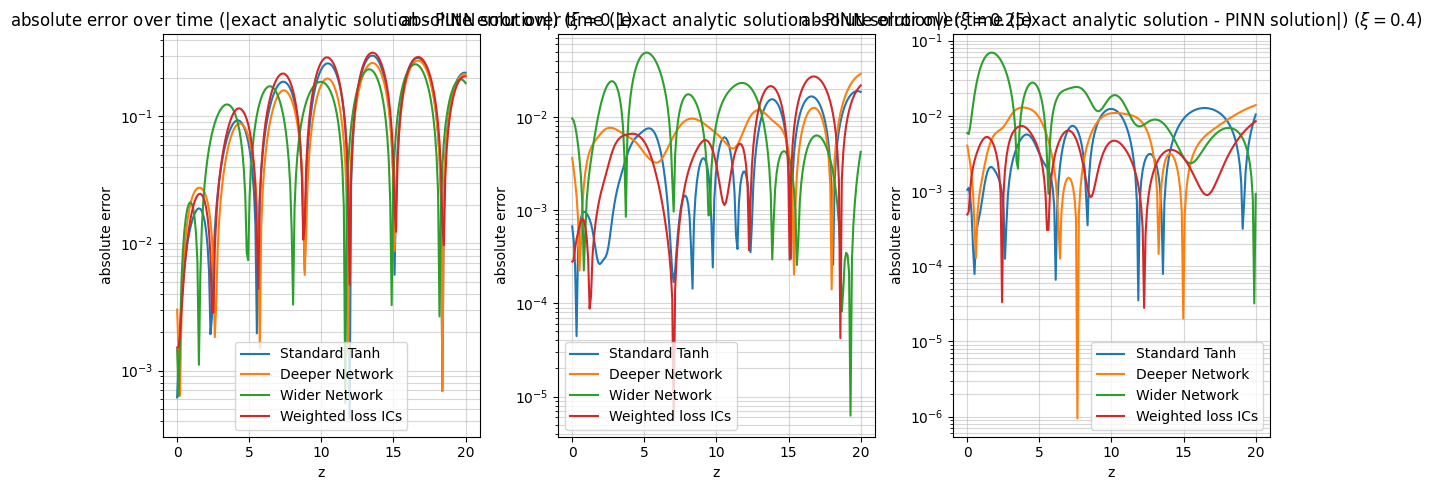


  ξ = 0.1
            Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
    Standard Tanh 0.127292   0.301547      0.297370    0.000370   8196
   Deeper Network 0.111823   0.275660      0.261520    0.000357   7771
    Wider Network 0.116409   0.257608      0.258571    0.000638  58298
Weighted loss ICs 0.136388   0.318076      0.315852    0.000456  23629

  ξ = 0.25
            Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
    Standard Tanh 0.005679   0.018856      0.020729    0.000370   8196
   Deeper Network 0.007651   0.028838      0.023933    0.000357   7771
    Wider Network 0.012355   0.048806      0.045323    0.000638  58298
Weighted loss ICs 0.007596   0.027101      0.028374    0.000456  23629

  ξ = 0.4
            Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
    Standard Tanh 0.005252   0.012668      0.019716    0.000370   8196
   Deeper Network 0.006350   0.013828      0.022531    0.000357   7771
    Wider Network 0.015908   0.069030      

In [18]:
# define the experiments
experiments = [
    {"name": "Standard Tanh", "act": nn.Tanh, "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":2000},
    # {"name": "ReLU", "act": nn.ReLU, "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 2000, "bs":1000},
    {"name": "Deeper Network", "act": nn.Tanh, "lambda": 1.0, "dim": 50, "layers": 6, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":2000},
    {"name": "Wider Network", "act": nn.Tanh, "lambda": 1.0, "dim": 200, "layers": 1, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":2000},
    {"name": "Weighted loss ICs", "act": nn.Tanh, "lambda": 10.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":2000}
]

results = run_experiments(experiments) # initializzation and training
plot_all_predictions(results) # plotting results for specific xi values
plot_all_losses(results) # plot loss curve
plot_all_errors(results) # plot the error analysis
summary_tables(results) # make a summary table where I have some metrics as max, mar, L2 

# third set of experiments
I increase the patience:
 * **BasePINN**: "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":5000
 * **DeeperPINN**: "lambda": 1.0, "dim": 50, "layers": 6, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":5000
 * **WiderPINN**: "lambda": 1.0, "dim": 200, "layers": 1, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":5000
 * **WeightedPINN**: "lambda": 10.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":5000, "lr":1e-3, "patience":5000

--- starting Experiment: Standard Tanh (loss lambda_ICs=1.0) ---
Step 0: Loss = 1.758102, Avg Loss of last 100 steps = 1.758102 (Best: 1.758102, Patience: 0/5000)
Step 1000: Loss = 0.003124, Avg Loss of last 100 steps = 0.003459 (Best: 0.003459, Patience: 0/5000)
Step 2000: Loss = 0.001504, Avg Loss of last 100 steps = 0.001837 (Best: 0.001838, Patience: 5/5000)
Step 3000: Loss = 0.000933, Avg Loss of last 100 steps = 0.001073 (Best: 0.000980, Patience: 34/5000)
Step 4000: Loss = 0.000892, Avg Loss of last 100 steps = 0.000782 (Best: 0.000694, Patience: 129/5000)
Step 5000: Loss = 0.000428, Avg Loss of last 100 steps = 0.000619 (Best: 0.000573, Patience: 314/5000)
Step 6000: Loss = 0.000531, Avg Loss of last 100 steps = 0.000536 (Best: 0.000492, Patience: 331/5000)
Step 7000: Loss = 0.000406, Avg Loss of last 100 steps = 0.000671 (Best: 0.000436, Patience: 86/5000)
Step 8000: Loss = 0.000580, Avg Loss of last 100 steps = 0.000509 (Best: 0.000436, Patience: 1086/5000)
Step 9000: Loss = 

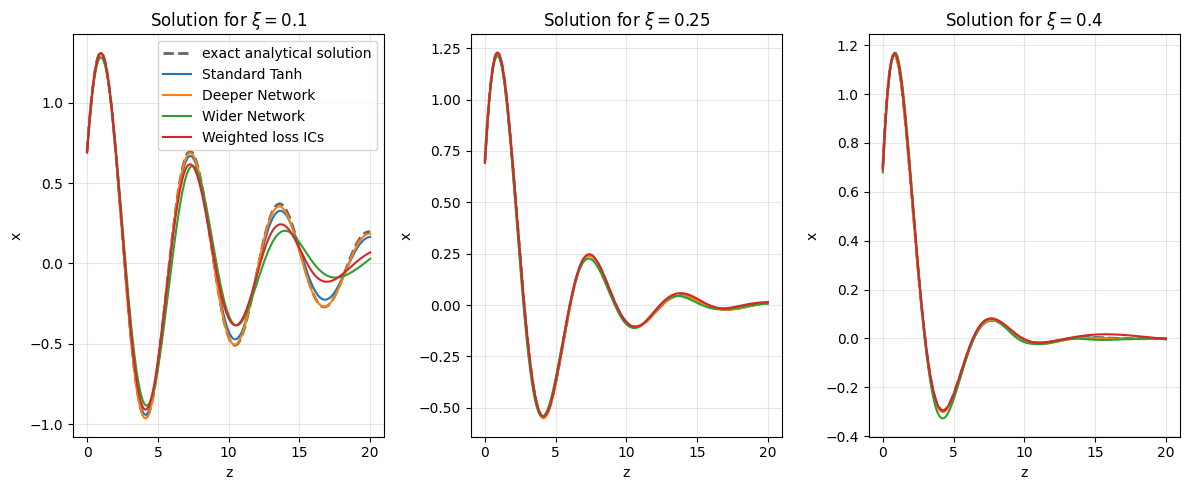

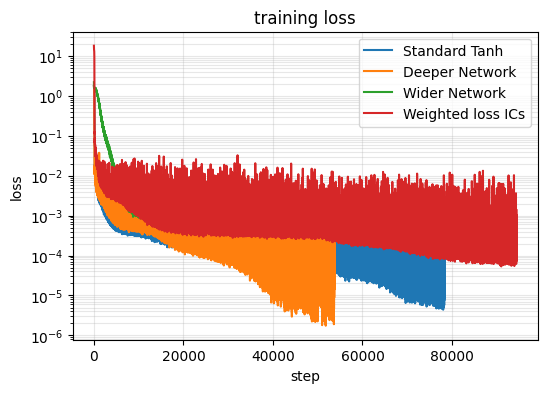

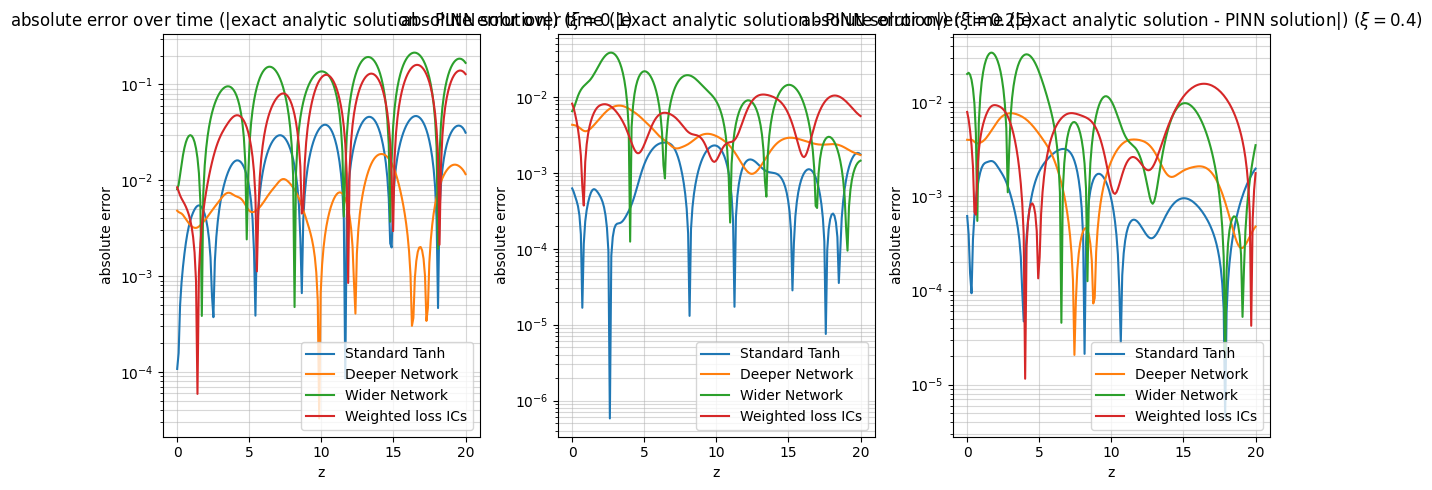


  ξ = 0.1
            Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
    Standard Tanh 0.020092   0.046864      0.046326    0.000010  78331
   Deeper Network 0.006958   0.018811      0.015695    0.000040  53719
    Wider Network 0.096459   0.214783      0.214751    0.000502  91929
Weighted loss ICs 0.063816   0.160104      0.149360    0.001368  94435

  ξ = 0.25
            Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
    Standard Tanh 0.000975   0.002510      0.003174    0.000010  78331
   Deeper Network 0.003228   0.007698      0.009581    0.000040  53719
    Wider Network 0.011166   0.038435      0.037905    0.000502  91929
Weighted loss ICs 0.005406   0.010775      0.016085    0.001368  94435

  ξ = 0.4
            Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
    Standard Tanh 0.001134   0.003203      0.004233    0.000010  78331
   Deeper Network 0.002819   0.007685      0.010543    0.000040  53719
    Wider Network 0.009084   0.033834      

In [20]:
# define the experiments
experiments = [
    {"name": "Standard Tanh", "act": nn.Tanh, "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":5000},
    # {"name": "ReLU", "act": nn.ReLU, "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 2000, "bs":1000},
    {"name": "Deeper Network", "act": nn.Tanh, "lambda": 1.0, "dim": 50, "layers": 6, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":5000},
    {"name": "Wider Network", "act": nn.Tanh, "lambda": 1.0, "dim": 200, "layers": 1, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":5000},
    {"name": "Weighted loss ICs", "act": nn.Tanh, "lambda": 10.0, "dim": 50, "layers": 3, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":5000}
]

results = run_experiments(experiments) # initializzation and training
plot_all_predictions(results) # plotting results for specific xi values
plot_all_losses(results) # plot loss curve
plot_all_errors(results) # plot the error analysis
summary_tables(results) # make a summary table where I have some metrics as max, mar, L2 

I notice now that from step 40000 I start to dont have a lot of decrease in the loss function for the first model, but the deeper model is still decresing the loss function, as expected, since is deeper we can expect he have more activation function so he can simulate better complex functions.
The wider model stopped to decrese the loss function after 10000/20000 steps because the Universal Approximation Theorem state that in principle a wider neural network can approximate the function but only if is infinitly wide.
We can also see how the loss became a lot more wobbly, sign that the batch size increase wasn't enough, we should probably implement a dropout or a normalization or decrease the learning rate because it's to aggressive. 

# BONUS EXPERIMENT
By reading the documentation I then realized there is an extra model to try, I quote:
>He et al (2020) propose a two-step training approach in which the loss function is minimized first by the Adam algorithm with a predefined stop condition, then by the L-BFGS-B optimizer. According to the aforementioned paper, for cases with a little amount of training data and/or residual points, L-BFGS-B, performs better with a faster rate of convergence and reduced computing cost.
 >— *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.3, Page 24*


start training (with Adam)...
Step 0: Loss = 1.822458, Avg Loss of last 100 steps = 1.822458 (Best: 1.822458, Patience: 0/5000)
Step 1000: Loss = 0.003223, Avg Loss of last 100 steps = 0.003805 (Best: 0.003805, Patience: 0/5000)
Step 2000: Loss = 0.001191, Avg Loss of last 100 steps = 0.001416 (Best: 0.001396, Patience: 15/5000)
Step 3000: Loss = 0.000891, Avg Loss of last 100 steps = 0.001105 (Best: 0.001017, Patience: 123/5000)
Step 4000: Loss = 0.000909, Avg Loss of last 100 steps = 0.000719 (Best: 0.000690, Patience: 56/5000)
continue training (with L-BFGS Fine-tuning)...
training complete.


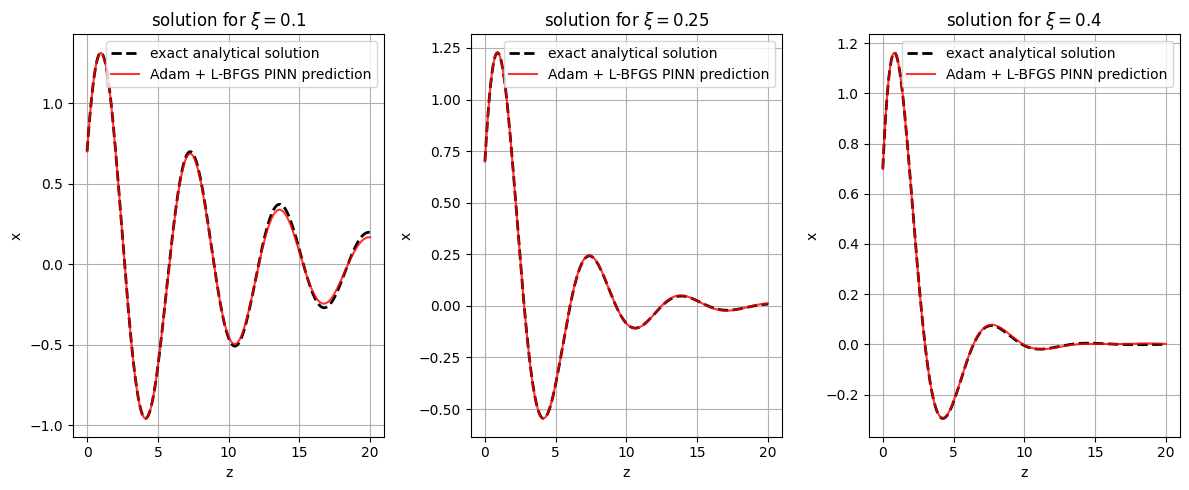

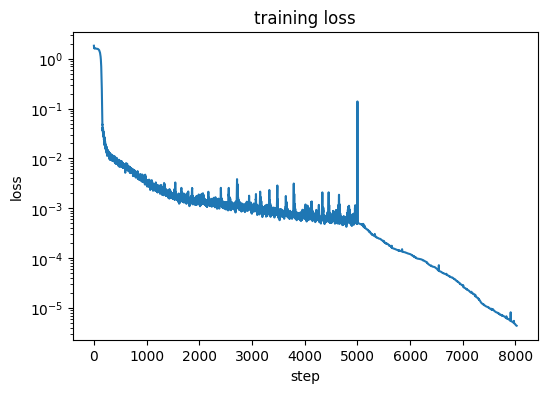

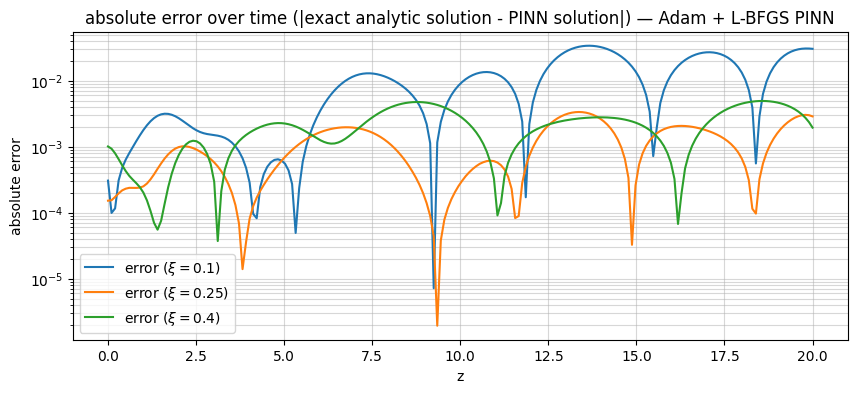


  ξ = 0.1
             Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
Adam + L-BFGS PINN 0.010888   0.033974      0.028191    0.000004   8023

  ξ = 0.25
             Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
Adam + L-BFGS PINN 0.001139   0.003365      0.003824    0.000004   8023

  ξ = 0.4
             Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
Adam + L-BFGS PINN 0.002155   0.004945      0.007675    0.000004   8023



In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# hibrid training loop
def train_pinn_hybrid(model, steps=5000, patience=5000, min_delta=1e-6):

    # I first optimize via Adam
    optimizer_adam = optim.Adam(model.parameters(), lr=1e-3)

    # initial conditions targets (specified in the test on the ML4SC website)
    x0_target = 0.7
    v0_target = 1.2
    
    # windows for the average loss calculation
    window = 100
    loss_window = []
    
    loss_history = []
    best_loss = float('inf')
    patience_counter = 0
    
    print("start training (with Adam)...")

    for step in range(steps):
        optimizer_adam.zero_grad()
        
        # sample random points for z and xi in given domains (specified in the test on the ML4SC website)
        batch_size = 1000
        z_col = torch.rand(batch_size, 1) * 20.0
        xi_col = torch.rand(batch_size, 1) * (0.4 - 0.1) + 0.1
        # at each of this random points we calculate the loss/physics violation
        loss_physics = physics_loss(model, z_col, xi_col)
        
        # initial condition loss (boundary loss)
        # Sample random xi for the boundary condition
        xi_bc = torch.rand(batch_size // 4, 1) * (0.4 - 0.1) + 0.1  # we pick a random xi again, no matter what xi I took, the oscillator always start in the same spot
        z_bc = torch.zeros_like(xi_bc)  # z is always 0 here
        z_bc.requires_grad = True  # we still need to track z if I want to track how much fast x change with z, so dx/dz

        # guess of the position at t=0:
        x_bc = model(z_bc, xi_bc)
        # then compute velocity at t=0:
        dx_bc = torch.autograd.grad(x_bc, z_bc, torch.ones_like(x_bc), create_graph=True)[0]
        
        # then calculate the penalty for position and velocity:
        loss_ic_x = torch.mean((x_bc - x0_target)**2)
        loss_ic_v = torch.mean((dx_bc - v0_target)**2)
        
                                                    # total loss, infact without the penalty for position and velocity
        loss = loss_physics + loss_ic_x + loss_ic_v # I would have that x=0 and v=0 for every time step minimize the loss and  
                                                    # so is the solution but that cannot be since of ICs different from zero

        loss.backward()         
        optimizer_adam.step()   

        current_loss = loss.item()
        loss_history.append(current_loss)
        
        # early stopping criteria: if the average loss doesnt improve at least of min_delta, for a number of consecutive steps equal to the patience, it stops early.
        loss_window.append(current_loss)
        if len(loss_window) > window:
            loss_window.pop(0)
        avg_loss = sum(loss_window) / len(loss_window)
        
        if avg_loss < best_loss - min_delta:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print(f"\nEarly stopping at step {step}")
            print(f"Best avg loss: {best_loss:.6f}, Current avg loss: {avg_loss:.6f}")
            break
        
        if step % 1000 == 0:
            print(f"Step {step}: Loss = {current_loss:.6f}, Avg Loss of last 100 steps = {avg_loss:.6f} (Best: {best_loss:.6f}, Patience: {patience_counter}/{patience})")            

    # after I optimized with Adam I do a fine tuning with L-BFGS
    print("continue training (with L-BFGS Fine-tuning)...")
    optimizer_lbfgs = optim.LBFGS(model.parameters(), 
                                  lr=1.0, 
                                  history_size=50, 
                                  max_iter=5000, 
                                  line_search_fn="strong_wolfe")
    
    # second sample, this sample is not in a loop, otherwise the LBFGS would get
    # confuse by the change of the distribution of points when I change steps 
    batch_size_lbfgs = 2000
    z_col_fixed = torch.rand(batch_size_lbfgs, 1) * 20.0
    xi_col_fixed = torch.rand(batch_size_lbfgs, 1) * (0.4 - 0.1) + 0.1
    
    xi_bc_fixed = torch.rand(batch_size_lbfgs // 4, 1) * (0.4 - 0.1) + 0.1
    z_bc_fixed = torch.zeros_like(xi_bc_fixed)
    z_bc_fixed.requires_grad = True 

    def closure():
        optimizer_lbfgs.zero_grad()
        
        # at each of this random points (NOW FIXED) we calculate the loss/physics violation
        loss_physics = physics_loss(model, z_col_fixed, xi_col_fixed)
        
        # guess of the position at t=0:
        x_bc = model(z_bc_fixed, xi_bc_fixed)
        # then compute velocity at t=0:
        dx_bc = torch.autograd.grad(x_bc, z_bc_fixed, torch.ones_like(x_bc), create_graph=True)[0]
        
        # then calculate the penalty for position and velocity:
        loss_ic_x = torch.mean((x_bc - x0_target)**2)
        loss_ic_v = torch.mean((dx_bc - v0_target)**2)        

                                                          # total loss, infact without the penalty for position and velocity
        total_loss = loss_physics + loss_ic_x + loss_ic_v # I would have that x=0 and v=0 for every time step minimize the loss and  
                                                          # so is the solution but that cannot be since of ICs different from zero

        total_loss.backward()
        
        # Append to history for plotting
        loss_history.append(total_loss.item())
        return total_loss

    optimizer_lbfgs.step(closure)
    print("training complete.")
    return loss_history
    
def summary_tables_single(model, history, model_name="Adam + L-BFGS PINN", test_xis=[0.1, 0.25, 0.4]):
    z_test = torch.linspace(0, 20, 500).view(-1, 1)
    for xi_val in test_xis:
        xi_test = torch.full_like(z_test, xi_val)
        exact = analytical_solution(z_test.numpy(), xi_val)
        with torch.no_grad():
            pred = model(z_test, xi_test).numpy()
        err = np.abs(exact - pred)
        df = pd.DataFrame([{
            "Model": model_name,
            "MAE": np.mean(err),
            "Max Error": np.max(err),
            "L2 Rel Error": np.sqrt(np.sum((exact - pred)**2) / np.sum(exact**2)),
            "Final Loss": history[-1],
            "Steps": len(history)
        }])
        print(f"\n{'='*70}")
        print(f"  ξ = {xi_val}")
        print(f"{'='*70}")
        print(df.to_string(index=False, float_format="%.6f"))
    print()


# initializzation and training via class calling
pinn = OscillatorPINN()
history = train_pinn_hybrid(pinn) 

plot_predictions(pinn, "Adam + L-BFGS PINN")
plot_loss(history)
plot_error(pinn, "Adam + L-BFGS PINN")
summary_tables_single(pinn, history) # make a summary table where I have some metrics as max, mar, L2 

what we did before this last experiment is not wasted: we can try to adapt the architecture found in the previous experiments to this mixed ADAM and L-BFGS-B way of optimizing the loss.


  Hybrid Adam + L-BFGS Experiment: Standard Tanh (Adam+L-BFGS)
start training (with Adam)...
Step 0: Loss = 1.822458, Avg Loss of last 100 steps = 1.822458 (Best: 1.822458, Patience: 0/2000)
Step 1000: Loss = 0.003223, Avg Loss of last 100 steps = 0.003805 (Best: 0.003805, Patience: 0/2000)
Step 2000: Loss = 0.001191, Avg Loss of last 100 steps = 0.001416 (Best: 0.001396, Patience: 15/2000)
Step 3000: Loss = 0.000891, Avg Loss of last 100 steps = 0.001105 (Best: 0.001017, Patience: 123/2000)
Step 4000: Loss = 0.000909, Avg Loss of last 100 steps = 0.000719 (Best: 0.000690, Patience: 56/2000)
continue training (with L-BFGS Fine-tuning)...
training complete.

  Hybrid Adam + L-BFGS Experiment: Deeper Network (Adam+L-BFGS)
start training (with Adam)...
Step 0: Loss = 1.800887, Avg Loss of last 100 steps = 1.800887 (Best: 1.800887, Patience: 0/2000)
Step 1000: Loss = 0.005521, Avg Loss of last 100 steps = 0.004769 (Best: 0.004599, Patience: 51/2000)
Step 2000: Loss = 0.004379, Avg Loss of

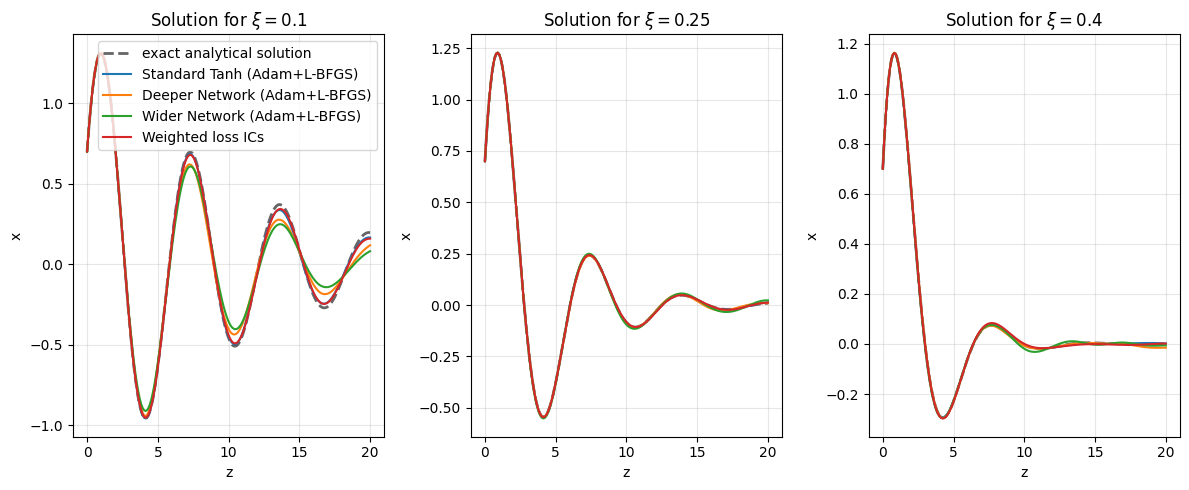

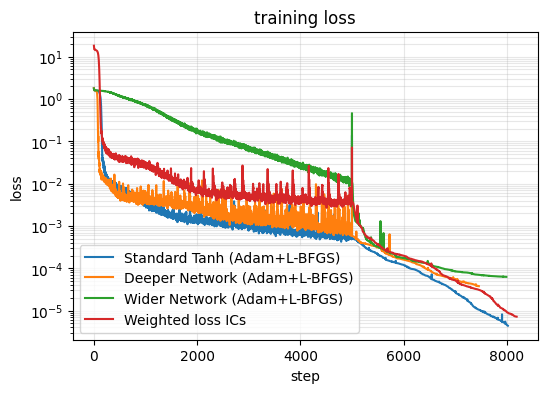

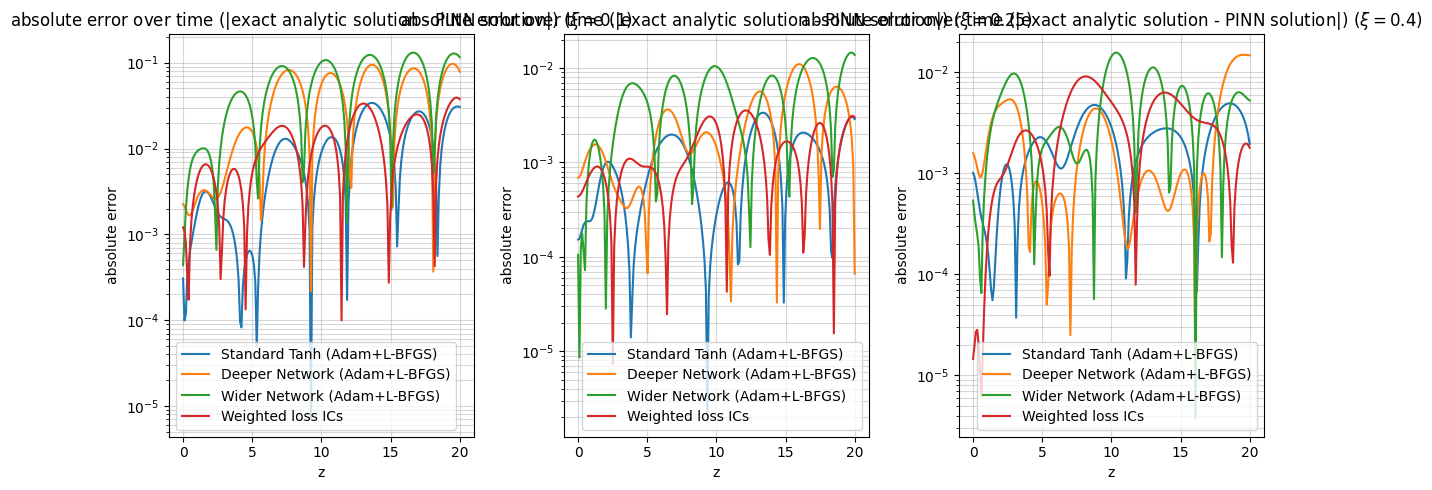


  ξ = 0.1
                       Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
 Standard Tanh (Adam+L-BFGS) 0.010888   0.033974      0.028191    0.000004   8023
Deeper Network (Adam+L-BFGS) 0.041372   0.097072      0.098695    0.000038   7461
 Wider Network (Adam+L-BFGS) 0.059199   0.130843      0.135921    0.000063   7994
           Weighted loss ICs 0.013102   0.039137      0.031077    0.000007   8193

  ξ = 0.25
                       Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
 Standard Tanh (Adam+L-BFGS) 0.001139   0.003365      0.003824    0.000004   8023
Deeper Network (Adam+L-BFGS) 0.002805   0.011017      0.010159    0.000038   7461
 Wider Network (Adam+L-BFGS) 0.005454   0.014598      0.017500    0.000063   7994
           Weighted loss ICs 0.001383   0.003562      0.004401    0.000007   8193

  ξ = 0.4
                       Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
 Standard Tanh (Adam+L-BFGS) 0.002155   0.004945      0.007675  

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# hibrid training loop
def train_hybrid(model_name, activation, lambda_ic=1.0, hidden_dim=50, layers=3, adam_steps=5000, adam_lr=1e-3, batch_size=1000, lbfgs_max_iter=5000, lbfgs_batch_size=2000, patience=2000, min_delta=1e-6):

    print(f"\n{'='*70}")
    print(f"  Hybrid Adam + L-BFGS Experiment: {model_name}")
    print(f"{'='*70}")

    model = BasePINN(activation=activation, hidden_dim=hidden_dim, hidden_layers=layers)
    
    # initial conditions targets (specified in the test on the ML4SC website)
    x0_target = 0.7
    v0_target = 1.2


    # windows for the average loss calculation
    window = 100
    loss_window = []
    
    loss_history = []
    best_loss = float('inf')
    patience_counter = 0

    # I first optimize via Adam
    optimizer_adam = optim.Adam(model.parameters(), lr=adam_lr)

    print("start training (with Adam)...")

    for step in range(adam_steps):
        optimizer_adam.zero_grad()

        # sample random points for z and xi in given domains (specified in the test on the ML4SC website)
        z_col = torch.rand(batch_size, 1) * 20.0
        xi_col = torch.rand(batch_size, 1) * (0.4 - 0.1) + 0.1
        # at each of this random points we calculate the loss/physics violation
        loss_physics = physics_loss(model, z_col, xi_col)

        # initial condition loss (boundary loss)
        # Sample random xi for the boundary condition
        xi_bc = torch.rand(batch_size // 4, 1) * (0.4 - 0.1) + 0.1  # we pick a random xi again, no matter what xi I took, the oscillator always start in the same spot
        z_bc = torch.zeros_like(xi_bc)  # z is always 0 here
        z_bc.requires_grad = True  # we still need to track z if I want to track how much fast x change with z, so dx/dz
        
        # guess of the position at t=0:
        x_bc = model(z_bc, xi_bc)

        # then compute the velocity at t=0:
        dx_bc = torch.autograd.grad(
            x_bc, z_bc, 
            torch.ones_like(x_bc), 
            create_graph=True
        )[0]

        # than calculate the penalty for position and velocity:
        loss_ic_val = torch.mean((x_bc - x0_target)**2) + torch.mean((dx_bc - v0_target)**2)
        
                                                        # total loss, infact without the penalty for position and velocity        
        loss = loss_physics + (lambda_ic * loss_ic_val) # I would have that x=0 and v=0 for every time step minimize the loss and 
                                                        # so is the solution but that cannot be since of ICs different from zero       
        loss.backward()
        optimizer_adam.step()

        current_loss = loss.item()
        loss_history.append(loss.item())

        # early stopping criteria: if the average loss doesnt improve at least of min_delta, for a number of consecutive steps equal to the patience, it stops early.
        loss_window.append(current_loss)
        if len(loss_window) > window:
            loss_window.pop(0)
        avg_loss = sum(loss_window) / len(loss_window)
        
        if avg_loss < best_loss - min_delta:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print(f"\nEarly stopping at step {step}")
            print(f"Best avg loss: {best_loss:.6f}, Current avg loss: {avg_loss:.6f}")
            break
        
        if step % 1000 == 0:
            print(f"Step {step}: Loss = {current_loss:.6f}, Avg Loss of last 100 steps = {avg_loss:.6f} (Best: {best_loss:.6f}, Patience: {patience_counter}/{patience})")            

    # after I optimized with Adam I do a fine tuning with L-BFGS
    print("continue training (with L-BFGS Fine-tuning)...")

    optimizer_lbfgs = optim.LBFGS(model.parameters(),
                                  lr=1.0,
                                  history_size=50,
                                  max_iter=lbfgs_max_iter,
                                  line_search_fn="strong_wolfe")
    
    # second sample, this sample is not in a loop, otherwise the LBFGS would get
    # confuse by the change of the distribution of points when I change steps 
    batch_size_lbfgs = 2000
    z_col_fixed = torch.rand(batch_size_lbfgs, 1) * 20.0
    xi_col_fixed = torch.rand(batch_size_lbfgs, 1) * (0.4 - 0.1) + 0.1
    
    xi_bc_fixed = torch.rand(batch_size_lbfgs // 4, 1) * (0.4 - 0.1) + 0.1
    z_bc_fixed = torch.zeros_like(xi_bc_fixed)
    z_bc_fixed.requires_grad = True 


    lbfgs_iter = [0]  # mutable counter for closure

    def closure():
        optimizer_lbfgs.zero_grad()

        # at each of this random points (NOW FIXED) we calculate the loss/physics violation
        loss_physics = physics_loss(model, z_col_fixed, xi_col_fixed)

        # guess of the position at t=0:
        x_bc = model(z_bc_fixed, xi_bc_fixed)
        # then compute velocity at t=0:
        dx_bc = torch.autograd.grad(x_bc, z_bc_fixed, torch.ones_like(x_bc), create_graph=True)[0]

        # then calculate the penalty for position and velocity:
        loss_ic_x = torch.mean((x_bc - x0_target)**2)
        loss_ic_v = torch.mean((dx_bc - v0_target)**2)        

                                                          # total loss, infact without the penalty for position and velocity
        total_loss = loss_physics + loss_ic_x + loss_ic_v # I would have that x=0 and v=0 for every time step minimize the loss and  
                                                          # so is the solution but that cannot be since of ICs different from zero

        total_loss.backward()
        
        # Append to history for plotting
        loss_history.append(total_loss.item())
        return total_loss

    optimizer_lbfgs.step(closure)
    print("training complete.")
    return model, loss_history


# define the experiments
hybrid_experiments = [
    {"name": "Standard Tanh (Adam+L-BFGS)", "act": nn.Tanh, "lambda": 1.0, "dim": 50, "layers": 3, "adam_steps": 5000, "adam_lr": 1e-3, "bs": 1000, "lbfgs_max_iter": 5000, "lbfgs_bs": 2000},
    {"name": "Deeper Network (Adam+L-BFGS)", "act": nn.Tanh, "lambda": 1.0, "dim": 50, "layers": 6, "adam_steps": 5000, "adam_lr": 1e-3, "bs": 1000, "lbfgs_max_iter": 5000, "lbfgs_bs": 2000},
    {"name": "Wider Network (Adam+L-BFGS)", "act": nn.Tanh, "lambda": 1.0, "dim": 200, "layers": 1, "adam_steps": 5000, "adam_lr": 1e-3, "bs": 1000, "lbfgs_max_iter": 5000, "lbfgs_bs": 2000},
    {"name": "Weighted loss ICs", "act": nn.Tanh, "lambda": 10.0, "dim": 50, "layers": 3, "adam_steps": 5000, "adam_lr": 1e-3, "bs": 1000, "lbfgs_max_iter": 5000, "lbfgs_bs": 2000}
]


def run_hybrid_experiments(experiments):
    results = {}
    for exp in experiments:
        model, hist = train_hybrid(
            model_name=exp["name"],
            activation=exp["act"],
            lambda_ic=exp["lambda"],
            hidden_dim=exp["dim"],
            layers=exp["layers"],
            adam_steps=exp["adam_steps"],
            adam_lr=exp["adam_lr"],
            batch_size=exp["bs"],
            lbfgs_max_iter=exp["lbfgs_max_iter"],
            lbfgs_batch_size=exp["lbfgs_bs"]
        )
        results[exp["name"]] = {"model": model, "hist": hist}
    return results

 
hybrid_results = run_hybrid_experiments(hybrid_experiments) # initializzation and training
plot_all_predictions(hybrid_results) # plotting results for specific xi values
plot_all_losses(hybrid_results) # plot loss curve
plot_all_errors(hybrid_results) # plot the error analysis
summary_tables(hybrid_results) # make a summary table where I have some metrics as max, mar, L2 


other possible models can be modification on the number of layers and neuron, I quote and hightlight:
> Another example of how the differential problem affects network architecture can be found
> **in Kharazmi et al (2021b) for their hp-VPINN. The architecture is implemented with four layers and twenty neurons per layer**, but for an advection equation with a double discontinuity of the exact solution, they use an eight-layered deep network. For a
constrained approach, by utilizing a specific portion of the NN to satisfy the
required boundary conditions,
> **Zhu et al (2021) use five hidden layers and 250 neurons per layer to constitute the fully connected neural network**. Bringing
the number of layers higher, **in PINNeik (Waheed et al, 2021), a DNN with ten
hidden layers containing twenty neurons each is utilized**, with a locally adaptive inverse tangent function as the activation function for all hidden layers
except the final layer, which has a linear activation function.
> **He et al (2020) examines the effect of neural network size on state estimation accuracy. They begin by experimenting with various hidden layer sizes ranging from three to five, while maintaining a value of 32 neurons per layer**. Then they set the number of hidden layers to three, the activation function to hyperbolic tangent,
while varying the number of neurons in each hidden layer. 
>
> — *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.1, Pages 12*

let's try those architecture with the old pipeline with only Adam optimized and the new pipeline with best optimizer so far that we have founded (that is ADAM + L-BFGS):

--- starting Experiment: Kharazmi Deep Network (loss lambda_ICs=1.0) ---
Step 0: Loss = 1.850432 (Best: 1.850432, Patience: 0/10000)
Step 1000: Loss = 0.005505 (Best: 0.004728, Patience: 29/10000)
Step 2000: Loss = 0.001932 (Best: 0.001701, Patience: 14/10000)
Step 3000: Loss = 0.001341 (Best: 0.001083, Patience: 103/10000)
Step 4000: Loss = 0.001089 (Best: 0.000835, Patience: 103/10000)
Step 5000: Loss = 0.001222 (Best: 0.000815, Patience: 464/10000)
Step 6000: Loss = 0.002040 (Best: 0.000746, Patience: 796/10000)
Step 7000: Loss = 0.001036 (Best: 0.000740, Patience: 564/10000)
Step 8000: Loss = 0.001064 (Best: 0.000695, Patience: 143/10000)
Step 9000: Loss = 0.000913 (Best: 0.000614, Patience: 508/10000)
Step 10000: Loss = 0.000856 (Best: 0.000608, Patience: 83/10000)
Step 11000: Loss = 0.000868 (Best: 0.000569, Patience: 84/10000)
Step 12000: Loss = 0.000868 (Best: 0.000569, Patience: 1084/10000)
Step 13000: Loss = 0.000630 (Best: 0.000563, Patience: 499/10000)
Step 14000: Loss = 0.

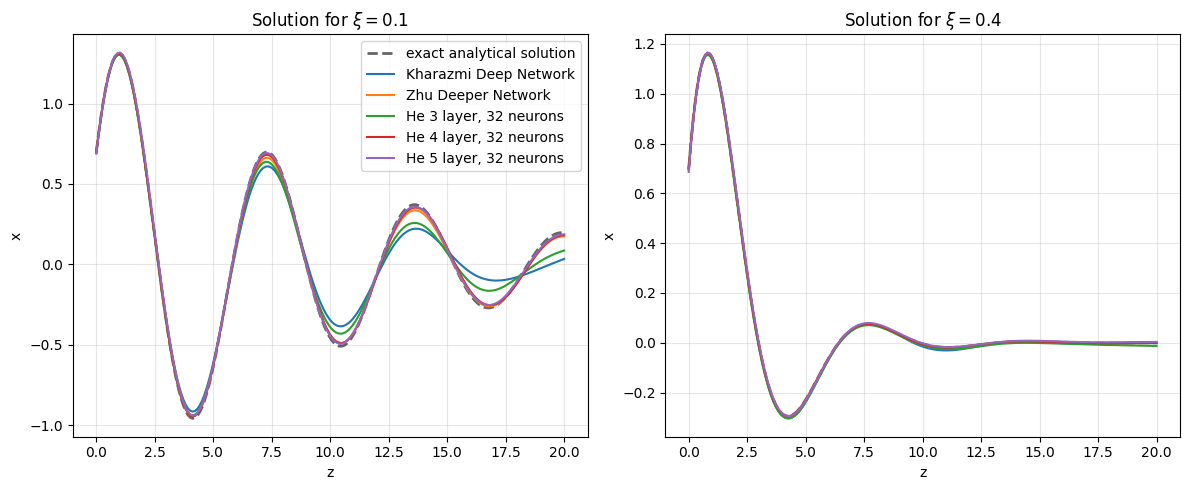

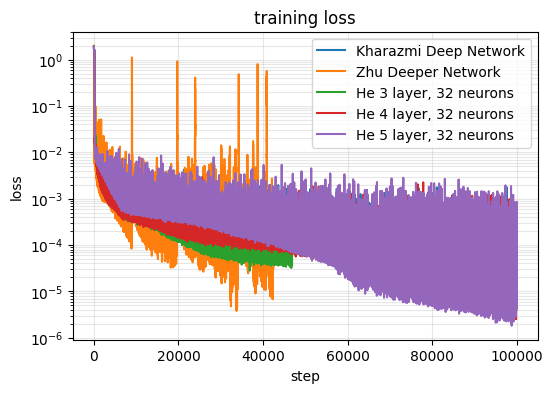

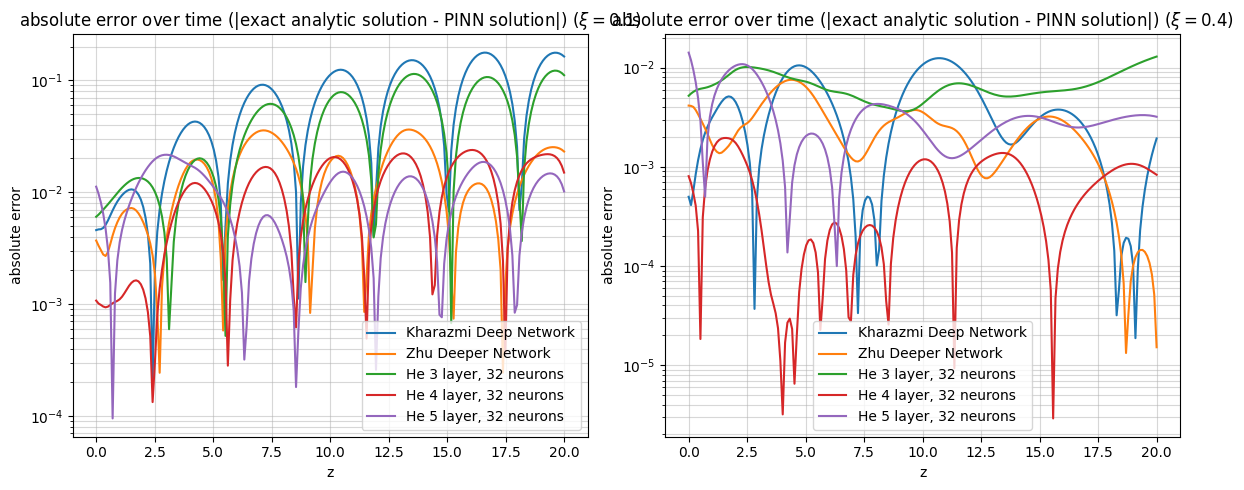


  ξ = 0.1
                 Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
 Kharazmi Deep Network 0.070252   0.176493      0.167557    0.000138 100000
    Zhu Deeper Network 0.015125   0.036268      0.034660    0.000067  42428
He 3 layer, 32 neurons 0.046279   0.121854      0.111146    0.000104  46875
He 4 layer, 32 neurons 0.011161   0.023828      0.025334    0.000009 100000
He 5 layer, 32 neurons 0.009764   0.021599      0.021470    0.000407 100000

  ξ = 0.2
                 Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
 Kharazmi Deep Network 0.004409   0.021154      0.015987    0.000138 100000
    Zhu Deeper Network 0.002794   0.008220      0.008327    0.000067  42428
He 3 layer, 32 neurons 0.008316   0.015252      0.022299    0.000104  46875
He 4 layer, 32 neurons 0.000723   0.002083      0.002096    0.000009 100000
He 5 layer, 32 neurons 0.004156   0.014364      0.012627    0.000407 100000

  ξ = 0.3
                 Model      MAE  Max Error  L2 Rel Erro

In [71]:
# define the experiments
experiments = [
    {"name": "Kharazmi Deep Network", "act": nn.Tanh, "lambda": 1.0, "dim": 20, "layers": 4, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":5000},
    # {"name": "ReLU", "act": nn.ReLU, "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 2000, "bs":1000},
    {"name": "Zhu Deeper Network", "act": nn.Tanh, "lambda": 1.0, "dim": 250, "layers": 5, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":5000},
    {"name": "He 3 layer, 32 neurons", "act": nn.Tanh, "lambda": 1.0, "dim": 32, "layers": 3, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":5000},
    {"name": "He 4 layer, 32 neurons", "act": nn.Tanh, "lambda": 1.0, "dim": 32, "layers": 4, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":5000},
    {"name": "He 5 layer, 32 neurons", "act": nn.Tanh, "lambda": 1.0, "dim": 32, "layers": 5, "number of steps": 100000, "bs":1000, "lr":1e-3, "patience":5000}
]

results = run_experiments(experiments) # initializzation and training
plot_all_predictions(results) # plotting results for specific xi values
plot_all_losses(results) # plot loss curve
plot_all_errors(results) # plot the error analysis
summary_tables(results) # make a summary table where I have some metrics as max, mar, L2 


  Hybrid Adam + L-BFGS Experiment: Kharazmi Deep Network
start training (with Adam)...
Step 0: Loss = 2.266744, Avg Loss of last 100 steps = 2.266744 (Best: 2.266744, Patience: 0/2000)
Step 1000: Loss = 0.005032, Avg Loss of last 100 steps = 0.005862 (Best: 0.005862, Patience: 0/2000)
Step 2000: Loss = 0.003175, Avg Loss of last 100 steps = 0.003317 (Best: 0.003313, Patience: 2/2000)
Step 3000: Loss = 0.001593, Avg Loss of last 100 steps = 0.001537 (Best: 0.001537, Patience: 18/2000)
Step 4000: Loss = 0.000865, Avg Loss of last 100 steps = 0.000963 (Best: 0.000957, Patience: 5/2000)
continue training (with L-BFGS Fine-tuning)...
training complete.

  Hybrid Adam + L-BFGS Experiment: Zhu Deeper Network
start training (with Adam)...
Step 0: Loss = 1.893569, Avg Loss of last 100 steps = 1.893569 (Best: 1.893569, Patience: 0/2000)
Step 1000: Loss = 0.010017, Avg Loss of last 100 steps = 0.005647 (Best: 0.004088, Patience: 168/2000)
Step 2000: Loss = 0.002204, Avg Loss of last 100 steps = 

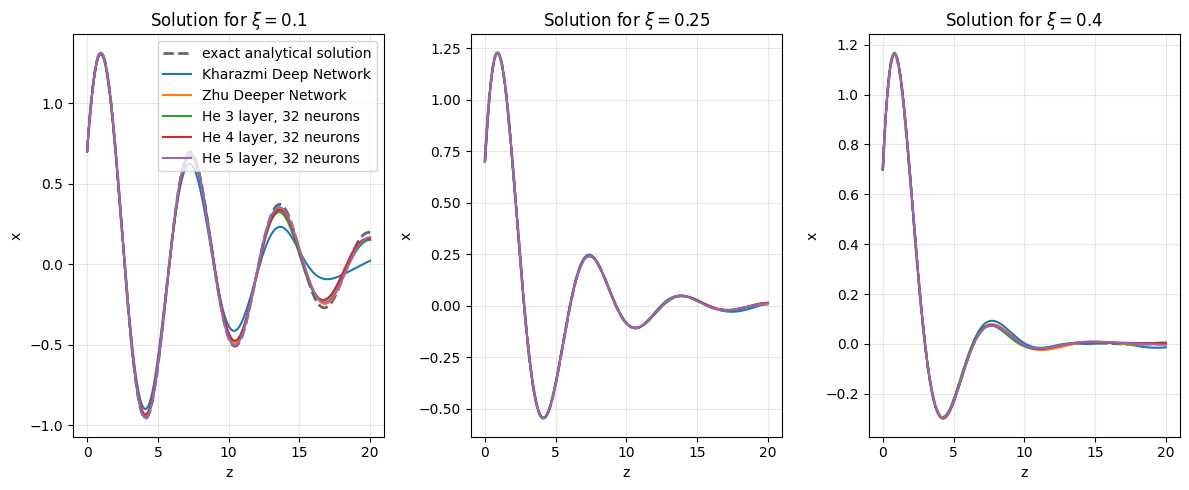

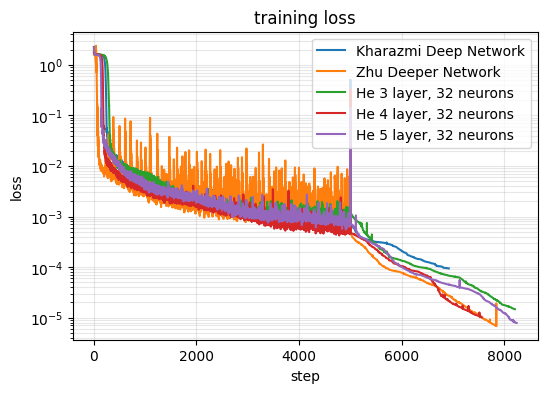

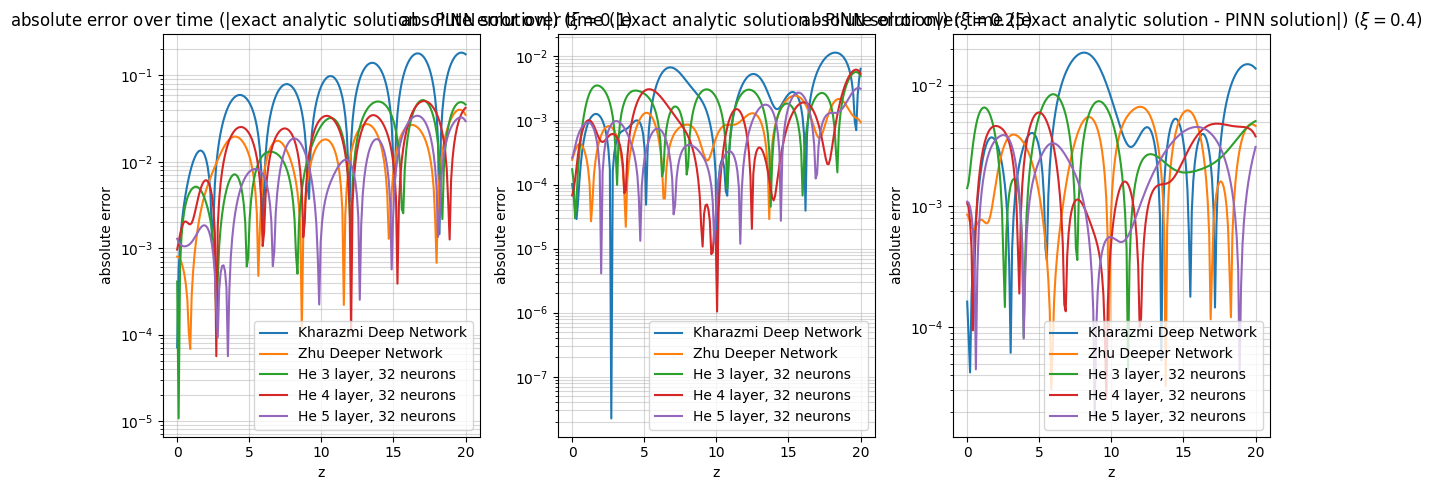


  ξ = 0.1
                 Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
 Kharazmi Deep Network 0.067317   0.183702      0.161115    0.000094   6920
    Zhu Deeper Network 0.014031   0.040138      0.032102    0.000007   7847
He 3 layer, 32 neurons 0.019057   0.051869      0.047623    0.000015   8208
He 4 layer, 32 neurons 0.019325   0.050518      0.044330    0.000010   7565
He 5 layer, 32 neurons 0.010578   0.034118      0.027177    0.000008   8243

  ξ = 0.25
                 Model      MAE  Max Error  L2 Rel Error  Final Loss  Steps
 Kharazmi Deep Network 0.003081   0.011493      0.011249    0.000094   6920
    Zhu Deeper Network 0.000915   0.002447      0.002875    0.000007   7847
He 3 layer, 32 neurons 0.001900   0.005729      0.005915    0.000015   8208
He 4 layer, 32 neurons 0.001183   0.006241      0.004647    0.000010   7565
He 5 layer, 32 neurons 0.000870   0.003229      0.003051    0.000008   8243

  ξ = 0.4
                 Model      MAE  Max Error  L2 Rel Err

In [35]:
hybrid_experiments = [
    {"name": "Kharazmi Deep Network", "act": nn.Tanh, "lambda": 1.0, "dim": 20, "layers": 4, "adam_steps": 5000, "adam_lr": 1e-3, "bs": 1000, "lbfgs_max_iter": 5000, "lbfgs_bs": 2000},
    # {"name": "ReLU", "act": nn.ReLU, "lambda": 1.0, "dim": 50, "layers": 3, "number of steps": 2000, "bs":1000},
    {"name": "Zhu Deeper Network", "act": nn.Tanh, "lambda": 1.0, "dim": 250, "layers": 5, "adam_steps": 5000, "adam_lr": 1e-3, "bs": 1000, "lbfgs_max_iter": 5000, "lbfgs_bs": 2000},
    {"name": "He 3 layer, 32 neurons", "act": nn.Tanh, "lambda": 1.0, "dim": 32, "layers": 3, "adam_steps": 5000, "adam_lr": 1e-3, "bs": 1000, "lbfgs_max_iter": 5000, "lbfgs_bs": 2000},
    {"name": "He 4 layer, 32 neurons", "act": nn.Tanh, "lambda": 1.0, "dim": 32, "layers": 4, "adam_steps": 5000, "adam_lr": 1e-3, "bs": 1000, "lbfgs_max_iter": 5000, "lbfgs_bs": 2000},
    {"name": "He 5 layer, 32 neurons", "act": nn.Tanh, "lambda": 1.0, "dim": 32, "layers": 5, "adam_steps": 5000, "adam_lr": 1e-3, "bs": 1000, "lbfgs_max_iter": 5000, "lbfgs_bs": 2000}
]

hybrid_results = run_hybrid_experiments(hybrid_experiments) # initializzation and training
plot_all_predictions(hybrid_results) # plotting results for specific xi values
plot_all_losses(hybrid_results) # plot loss curve
plot_all_errors(hybrid_results) # plot the error analysis
summary_tables(hybrid_results) # make a summary table where I have some metrics as max, mar, L2 


or we can adopt different models respect to feedforward networks as convolutional neural networks, recurrent neural networks or bayesian neural network, for more informations on the review of this methods:
> — *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 2.1.2, 2.1.3 e 2.1.4, from Page 14 to 18*

I hope this project was enough to make me a GSoC 2026 candidate to your lab. I have been studying neural networks for more than one year, and I am diving into the most complex problems and trying to do my best. My degree is basically in Complex Systems, and even though I studied hard in every topic and aced every exam, I think neural networks resonate much more with me compared to, for examples, pandemic models or problems regarding the electrodynamics of continuous media. You can look to my projects for internship and master thesis, or to my certifications from DeepLearning.AI, or to my notes and grades of my masters and I think you will conclude that I have passion for these topics. Also, I am at Naples University at the mathematics department as professor Salvatore Cuomo, we could work together for this project and we could also use his expertise in this research. I tried my best to explain each decision with logic or with the literature review. 

I would like to talk with you more about the project or the papers attached to the website. Even without the GSoC scholarship, I hope we can still work together; until my graduation in the summer, I am basically free. Having a high level scientist at a high level organization as Alabama University, Fermilab or Florida State University as mentor would be an enormous gift that would help me to improve a higher speed. 

More papers working on this PINN problems and ODEs can be see here: 
> — *S. Cuomo et al., [Scientific Machine Learning through Physics-Informed Neural Networks](https://doi.org/10.48550/arXiv.2201.05624), Chapter 3.1, Pages 29 & 30*
